# Homework 3
Homeworks are an individual assessment, you should not work in groups.

You will be turning in:

1. A [README.md](https://github.com/cmparlettpelleriti/CPSC392ParlettPelleriti/blob/master/Admin/READMEexample.md) with all the relevant information
2. An .ipynb or .py with just your code (show all code necessary for the analysis, but remove superfluous code)
3. A PDF with your Report (rendered via Quarto or Google Docs)




## Data
We're going to do some customer segmentation for a **media company** (a digital magazine) to help them understand the needs of their customers better, and put them into useful groups of similar clusters. There are two datasets each of which is a random sample of `200` customers. 

### Behavioral Data

[This dataset](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/HW3_behavioral.csv) contains information about the media company customers' behavior on the site. The variables in the customer data include:

- `id`: customer id
- `gender`: self-disclosed gender identity, `male`, `female`, `nonbinary` or `other`
- `age`: age in years
- `current_income`: self-reported current annual income in thousands
- `time_spent_browsing`: average number of minutes spent browsing website per month 
- `prop_ad_clicks`: proportion of website ads that they click on (between `0` and `1`)
- `longest_read_time`: longest time spent consecutively on website in minutes
- `length_of_subscription`: number of days subscribed to the magazine
- `monthly_visits`: average number of visits to the site per month



### Article Data

[This dataset](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/HW3_topics.csv) contains information about the number of articles customers read in each topic in the past 3 months. The topics in the customer data include:

- `Stocks`
- `Productivity`
- `Fashion`
- `Celebrity`
- `Cryptocurrency`
- `Science`
- `Technology`
- `SelfHelp`
- `Fitness`
- `AI`


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
article = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/HW3_topics.csv")

In [3]:
behaviour = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/HW3_behavioral.csv")
behaviour

,age,current_income,time_spent_browsing,length_of_subscription,monthly_visits,longest_read_time,gender,prop_ads_clicked,id
0,44,72.19,566.839925,351.582980,32.736695,163.867691,woman,0.103480,64
1,37,59.03,593.367495,427.828363,36.015413,114.804382,nonbinary,0.131423,58
2,41,62.59,558.474711,455.073149,32.610060,74.286961,man,0.202710,161
3,47,61.63,546.606458,436.046753,32.516673,195.150214,woman,0.131722,92
4,55,67.70,679.886891,880.950477,32.240694,280.023385,other,0.233705,63
...,...,...,...,...,...,...,...,...,...
195,63,90.62,821.769112,339.887821,44.678657,220.263957,woman,0.110176,128
196,66,81.51,530.195838,704.672310,43.261213,219.216639,woman,0.287706,130
197,71,97.31,791.500530,774.973568,46.581148,271.340095,woman,0.184799,102
198,76,94.98,639.438101,533.877262,46.644034,225.790859,woman,0.155956,149


In [4]:
from plotnine import *
%matplotlib inline

In [5]:
from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder

In [6]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # simple TT split cv
import numpy as np
import seaborn as sb

from sklearn.metrics import accuracy_score, confusion_matrix,\
 f1_score, recall_score, precision_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder

In [7]:
contin = ['age', 'current_income', 'time_spent_browsing','prop_ads_clicked','longest_read_time','length_of_subscription','monthly_visits']
categorical = ['gender']
feats = ['age', 'current_income', 'time_spent_browsing','prop_ads_clicked','longest_read_time','length_of_subscription','gender','monthly_visits']

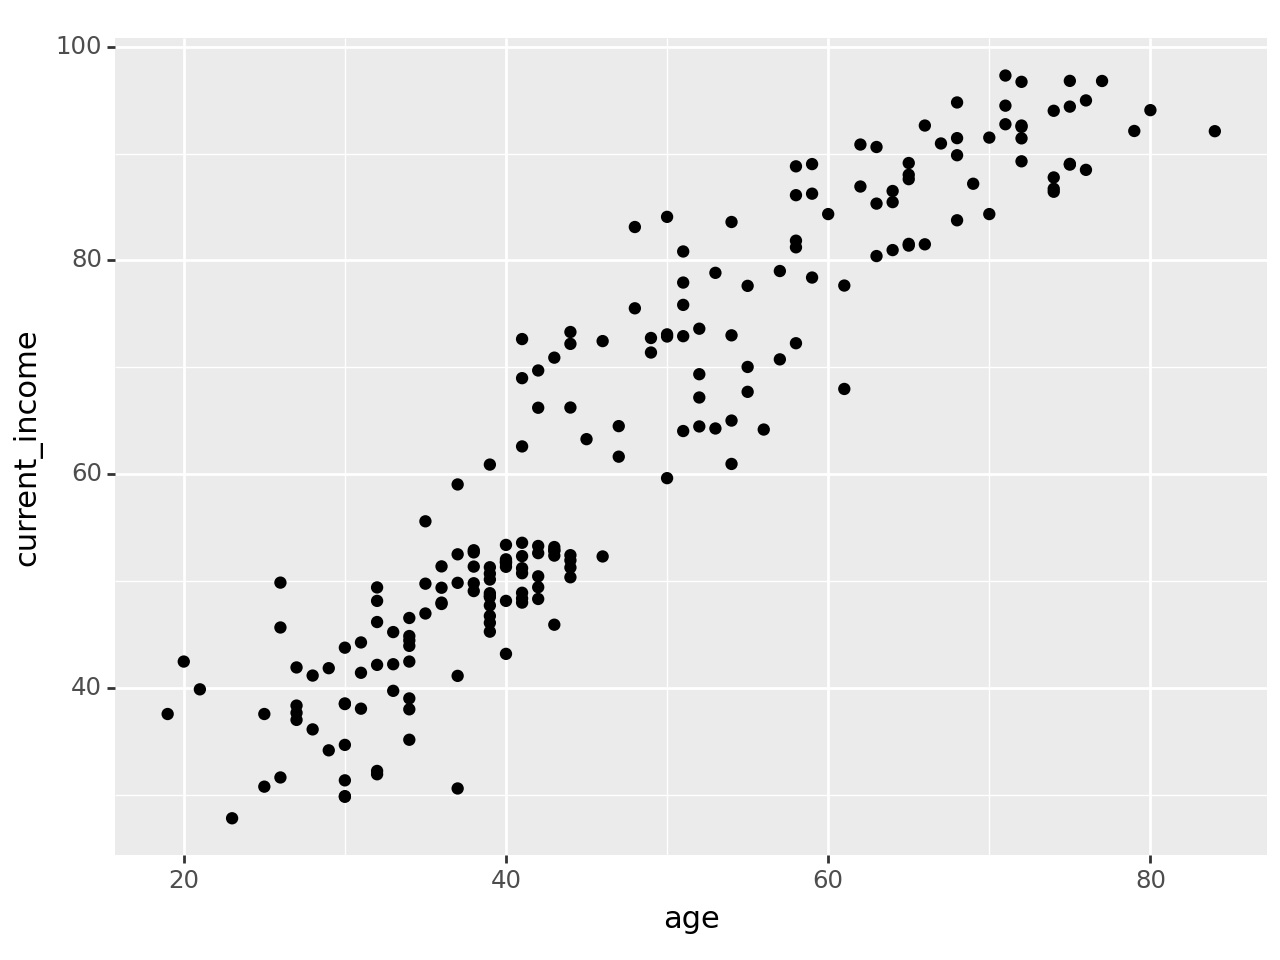

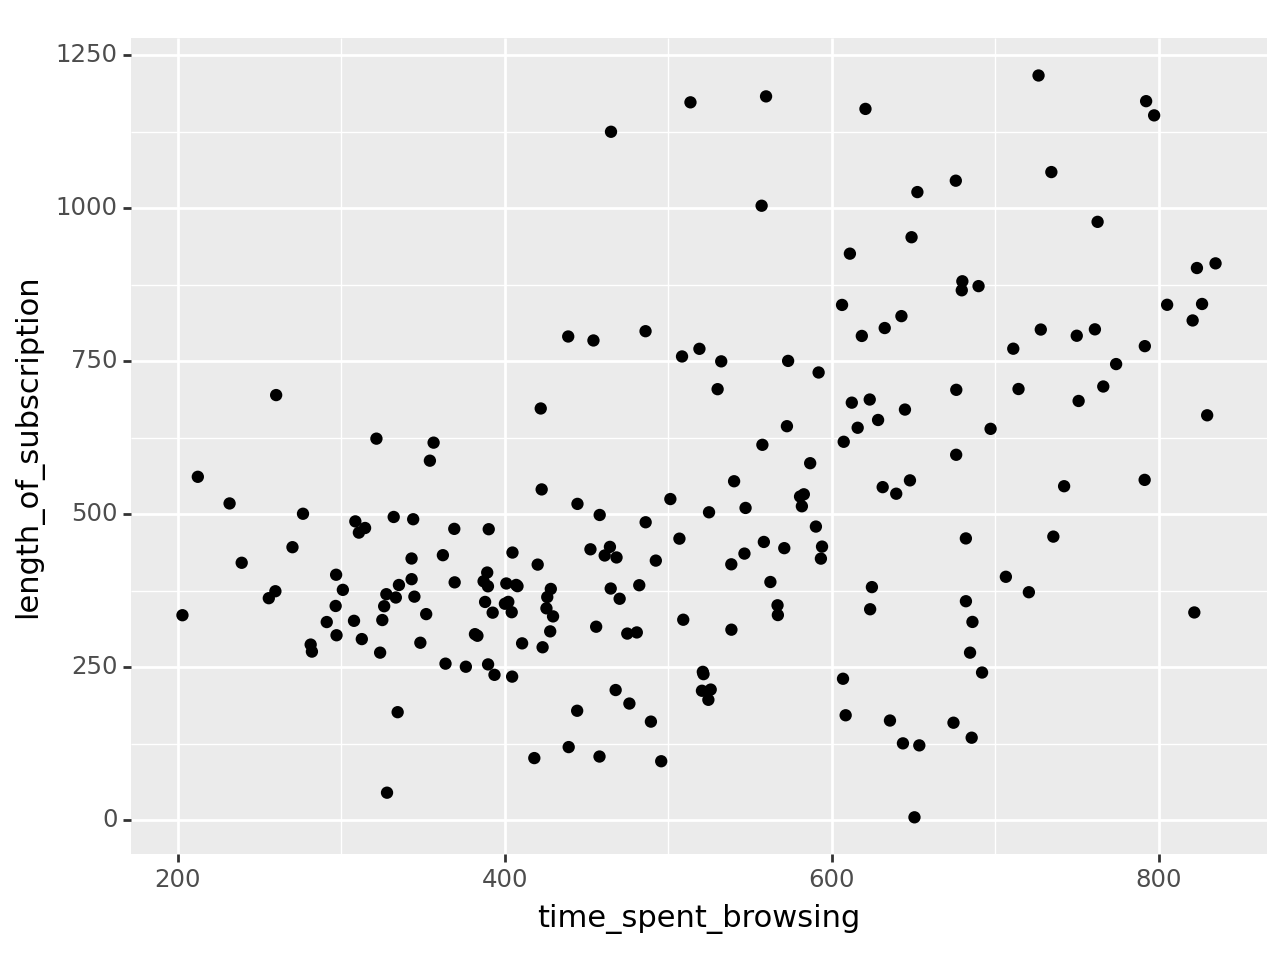

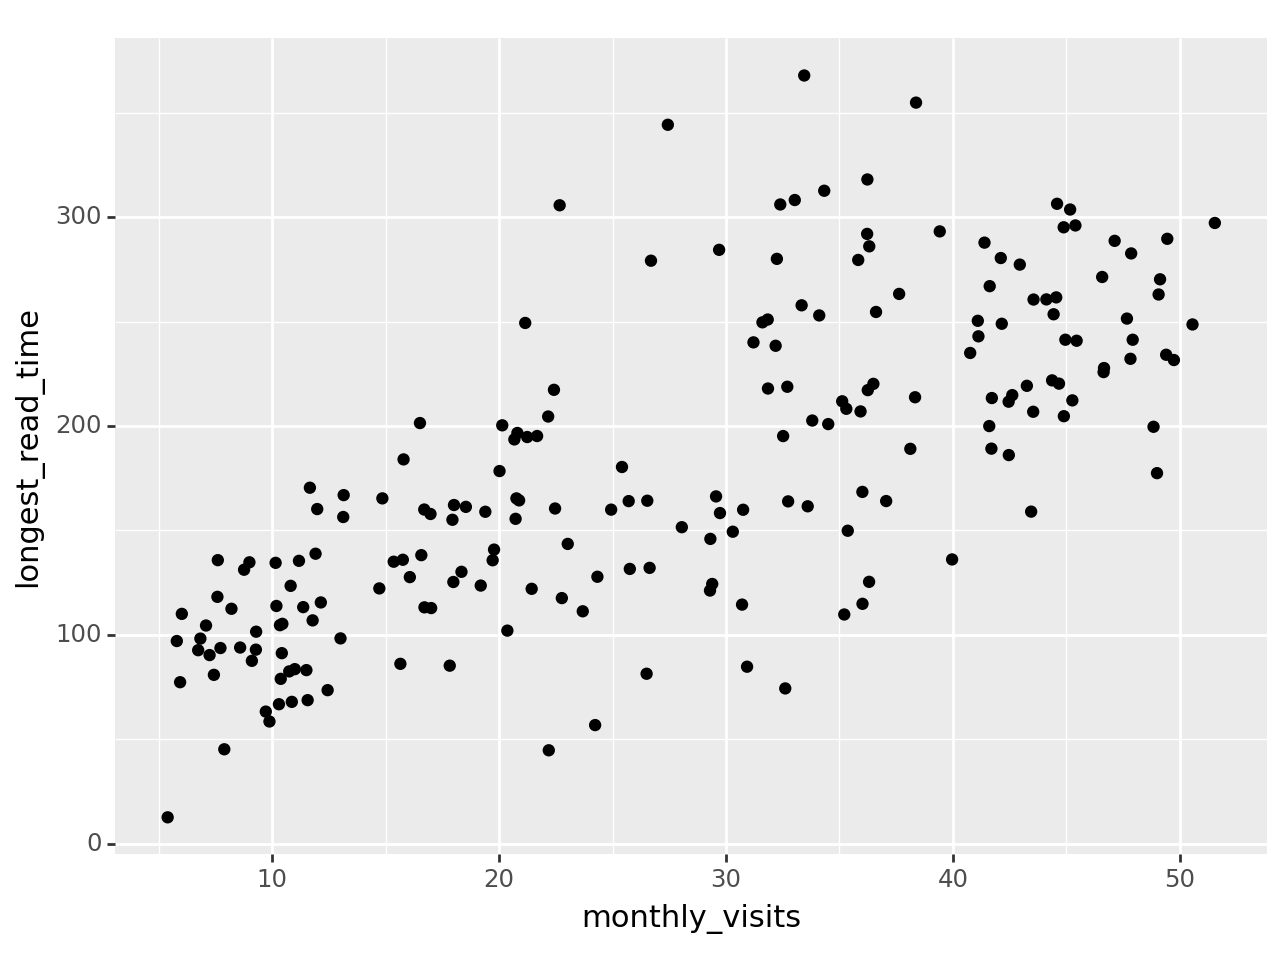

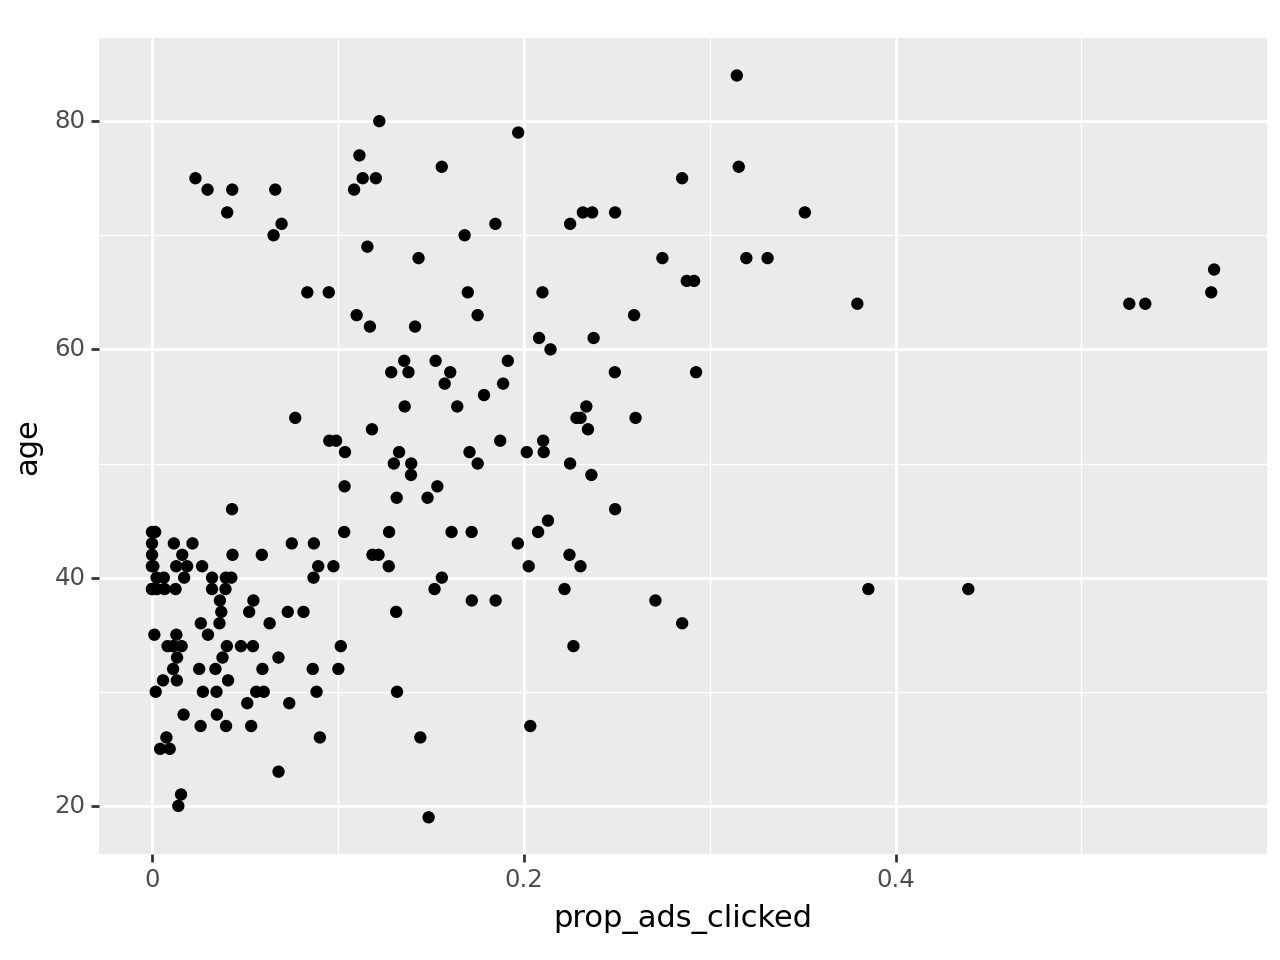

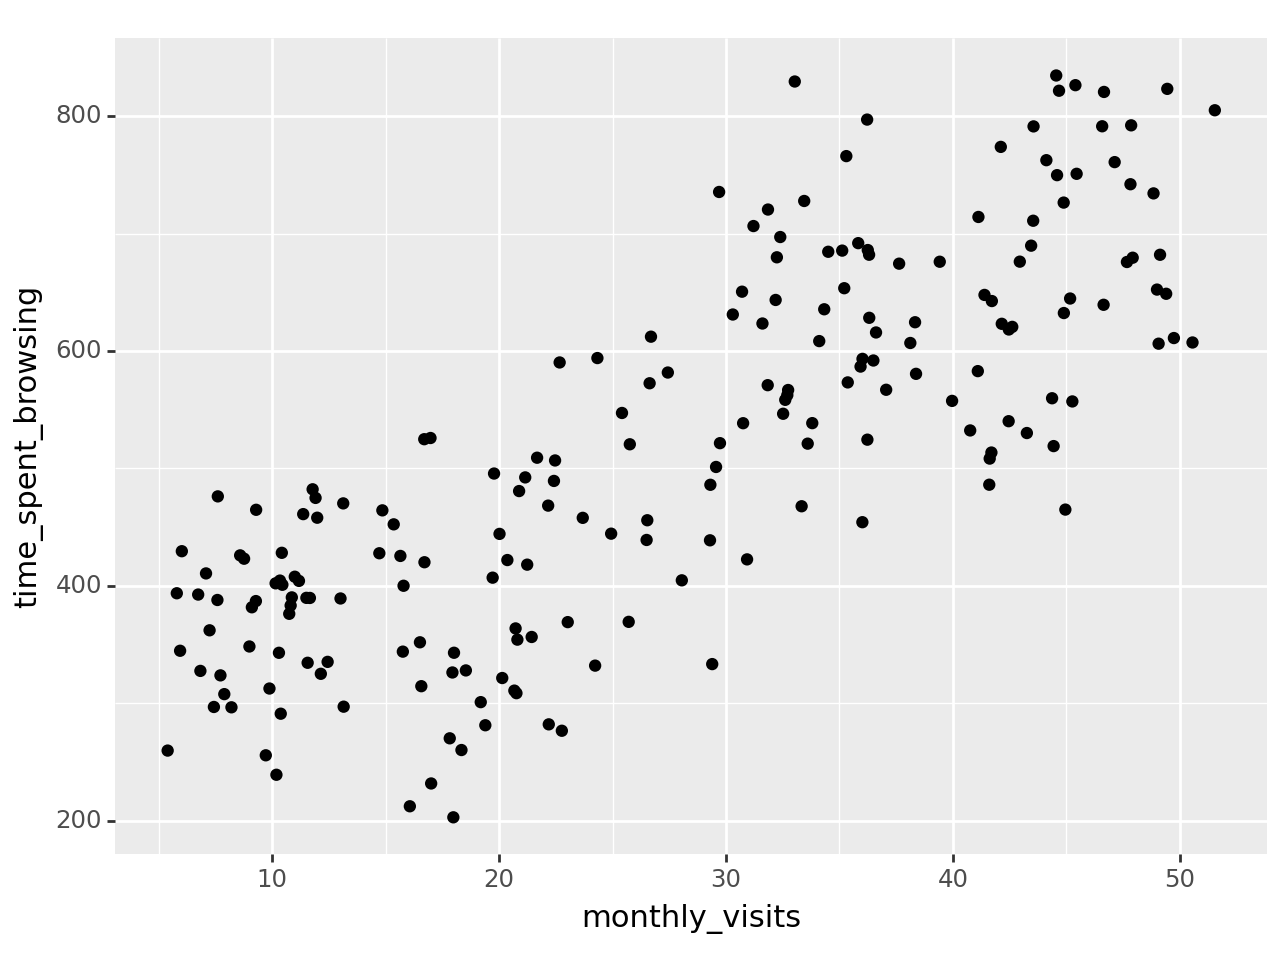

In [8]:
print((ggplot(behaviour, aes(x = "age", y = "current_income")) + geom_point()))
print((ggplot(behaviour, aes(x = "time_spent_browsing", y = "length_of_subscription")) + geom_point()))
print((ggplot(behaviour, aes(x = "monthly_visits", y = "longest_read_time")) + geom_point()))
print((ggplot(behaviour, aes(x = 'prop_ads_clicked', y = "age")) + geom_point()))
print((ggplot(behaviour, aes(x = "monthly_visits", y = "time_spent_browsing")) + geom_point()))

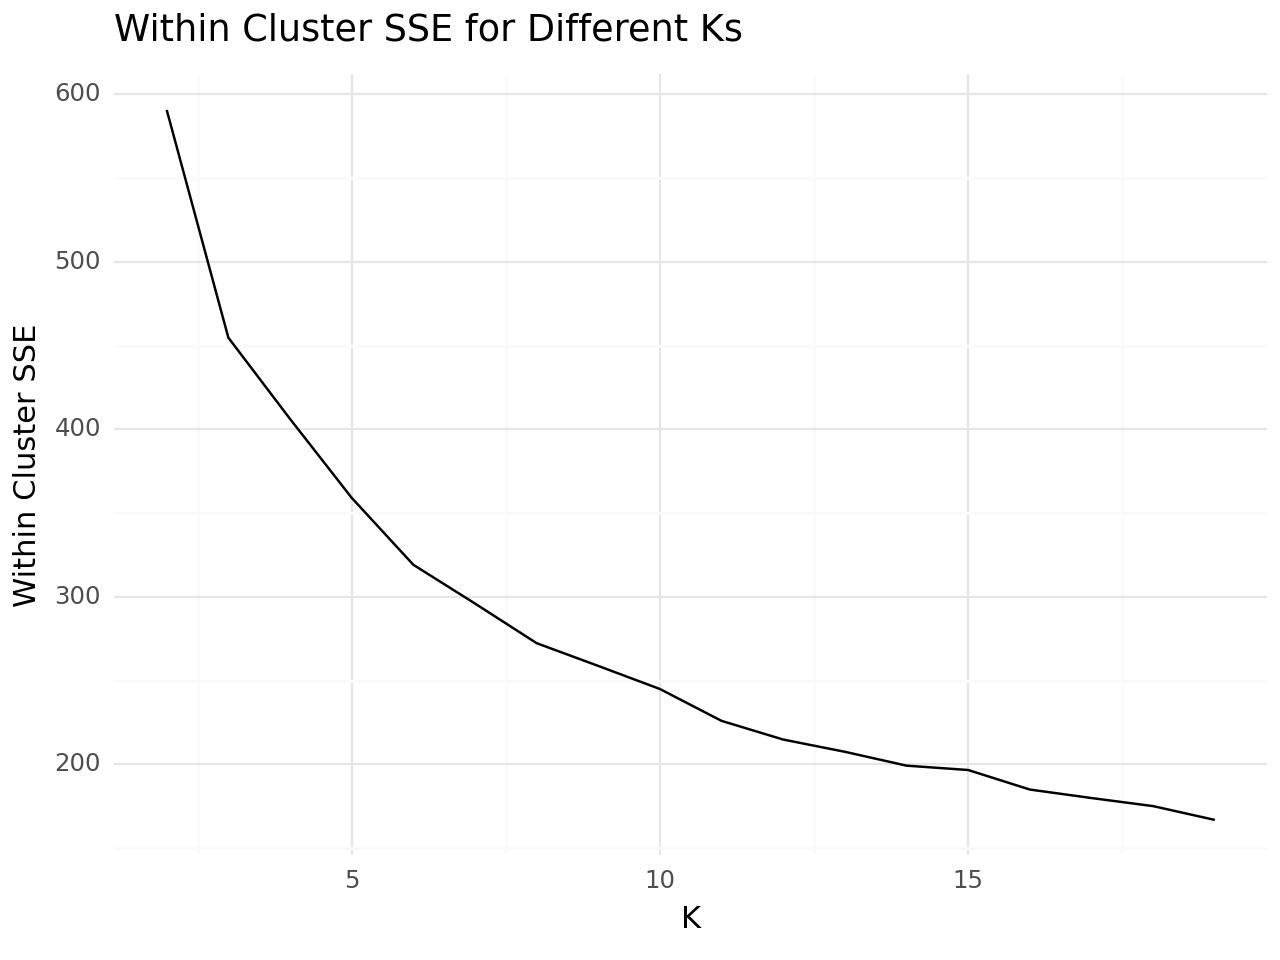

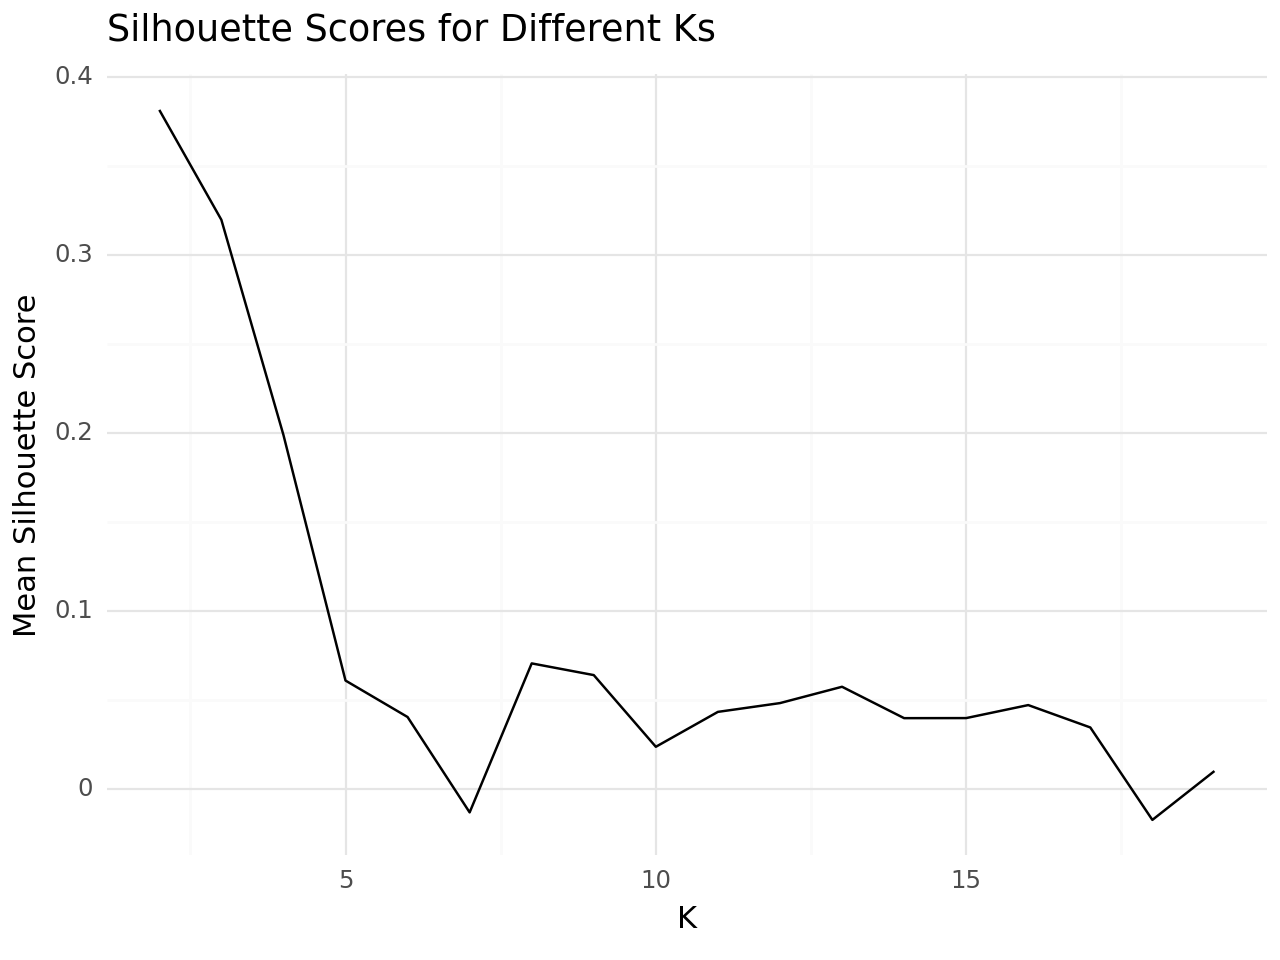

In [9]:
X = behaviour[contin]
pre = make_column_transformer(
                            (StandardScaler(), contin),
                            remainder = "passthrough"
                            )

metrics = {"SSE": [], "sil": [], "k": []}

for i in range(2,20):
    km = KMeans(i)
    pipe = Pipeline([
        ("pre", pre),
        ("km", km)
    ])
    
    labels = pipe.fit_predict(X[contin])
    sil = silhouette_score(X[contin], labels)
    sse = pipe.named_steps["km"].inertia_

    metrics["SSE"].append(sse)
    metrics["sil"].append(sil)
    metrics["k"].append(i)

df = pd.DataFrame(metrics)

print(ggplot(df, aes(x = "k", y = "SSE")) +
  geom_line() + theme_minimal() +
    labs(x = "K", y = "Within Cluster SSE",
         title = "Within Cluster SSE for Different Ks"))

print(ggplot(df, aes(x = "k", y = "sil")) +
  geom_line() + theme_minimal() +
    labs(x = "K", y = "Mean Silhouette Score",
         title = "Silhouette Scores for Different Ks"))

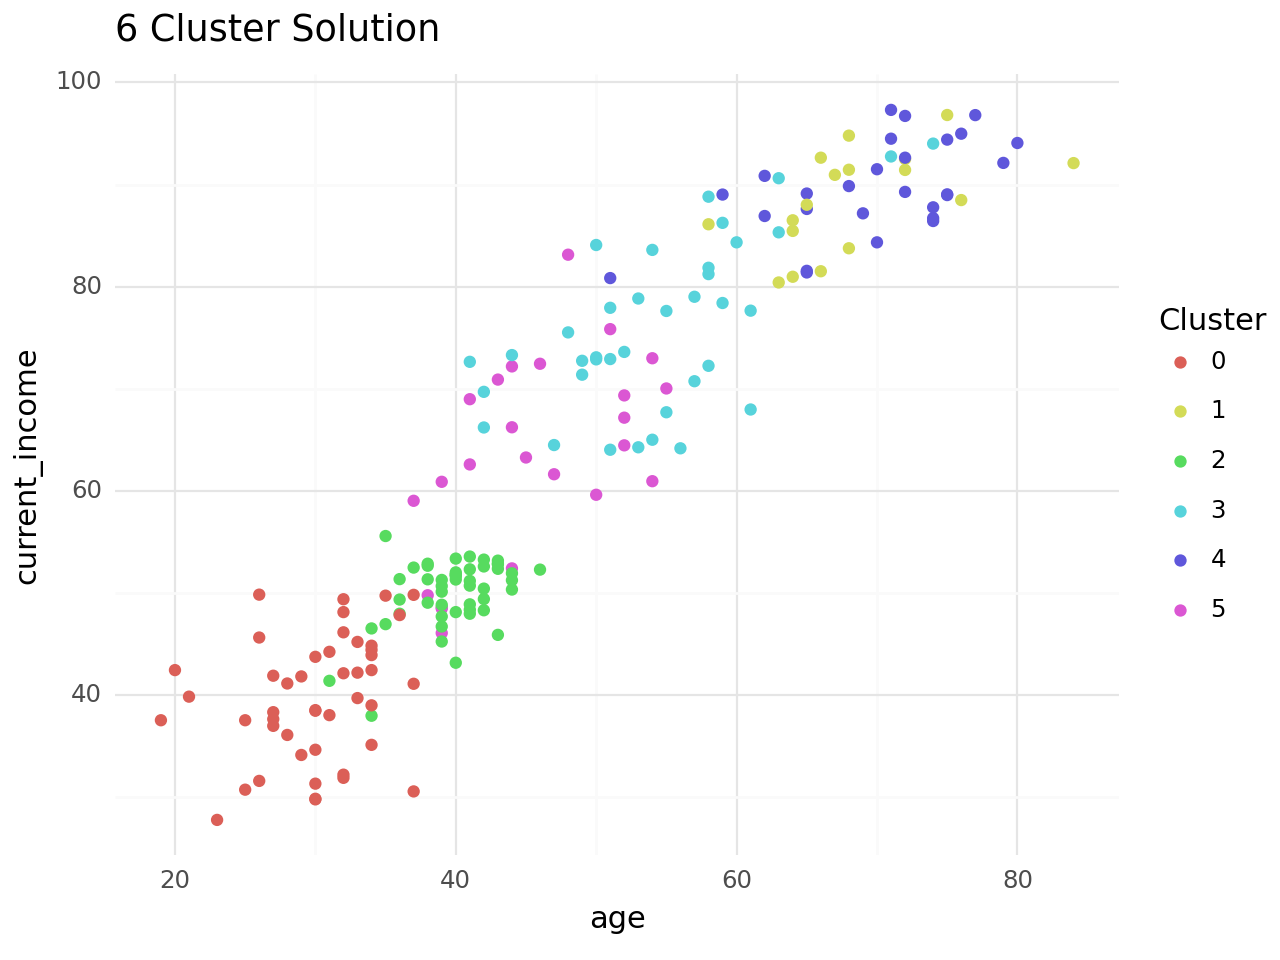

In [10]:
X = behaviour[feats]
pre = make_column_transformer(
                            (StandardScaler(), contin),
                            (OneHotEncoder(), categorical),
                            remainder = "passthrough"
                            )
km = KMeans(6)
pipe = Pipeline([
      ("pre", pre),
      ("km", km)
])
labels = pipe.fit_predict(X)

behaviour["cluster"] = labels
print(ggplot(behaviour, aes(x = "age", y = "current_income", color = "factor(cluster)")) +
      geom_point() +
      theme_minimal() + 
      scale_color_discrete(name = "Cluster") + 
      labs(x = "age", 
           y = "current_income",
           title = "6 Cluster Solution"))

In [11]:
pca = PCA()
pipe_behaviour = Pipeline([
    ("pre", pre),
    ("pca", pca)
])

behaviour_sub = behaviour[feats]
behaviour_sub.dropna(inplace = True)
behaviour_sub.reset_index(inplace = True, drop = True)
behaviour_sub


,age,current_income,time_spent_browsing,prop_ads_clicked,longest_read_time,length_of_subscription,gender,monthly_visits
0,44,72.19,566.839925,0.103480,163.867691,351.582980,woman,32.736695
1,37,59.03,593.367495,0.131423,114.804382,427.828363,nonbinary,36.015413
2,41,62.59,558.474711,0.202710,74.286961,455.073149,man,32.610060
3,47,61.63,546.606458,0.131722,195.150214,436.046753,woman,32.516673
4,55,67.70,679.886891,0.233705,280.023385,880.950477,other,32.240694
...,...,...,...,...,...,...,...,...
195,63,90.62,821.769112,0.110176,220.263957,339.887821,woman,44.678657
196,66,81.51,530.195838,0.287706,219.216639,704.672310,woman,43.261213
197,71,97.31,791.500530,0.184799,271.340095,774.973568,woman,46.581148
198,76,94.98,639.438101,0.155956,225.790859,533.877262,woman,46.644034


In [ ]:
# fit
pipe_behaviour.fit(behaviour_sub)
behaviour_PCs = pd.DataFrame(pipe_behaviour.transform(behaviour_sub))
behaviour_PCs.columns = ["PC" + str(i+1) for i in range(11)]

behaviour_PCs.head()

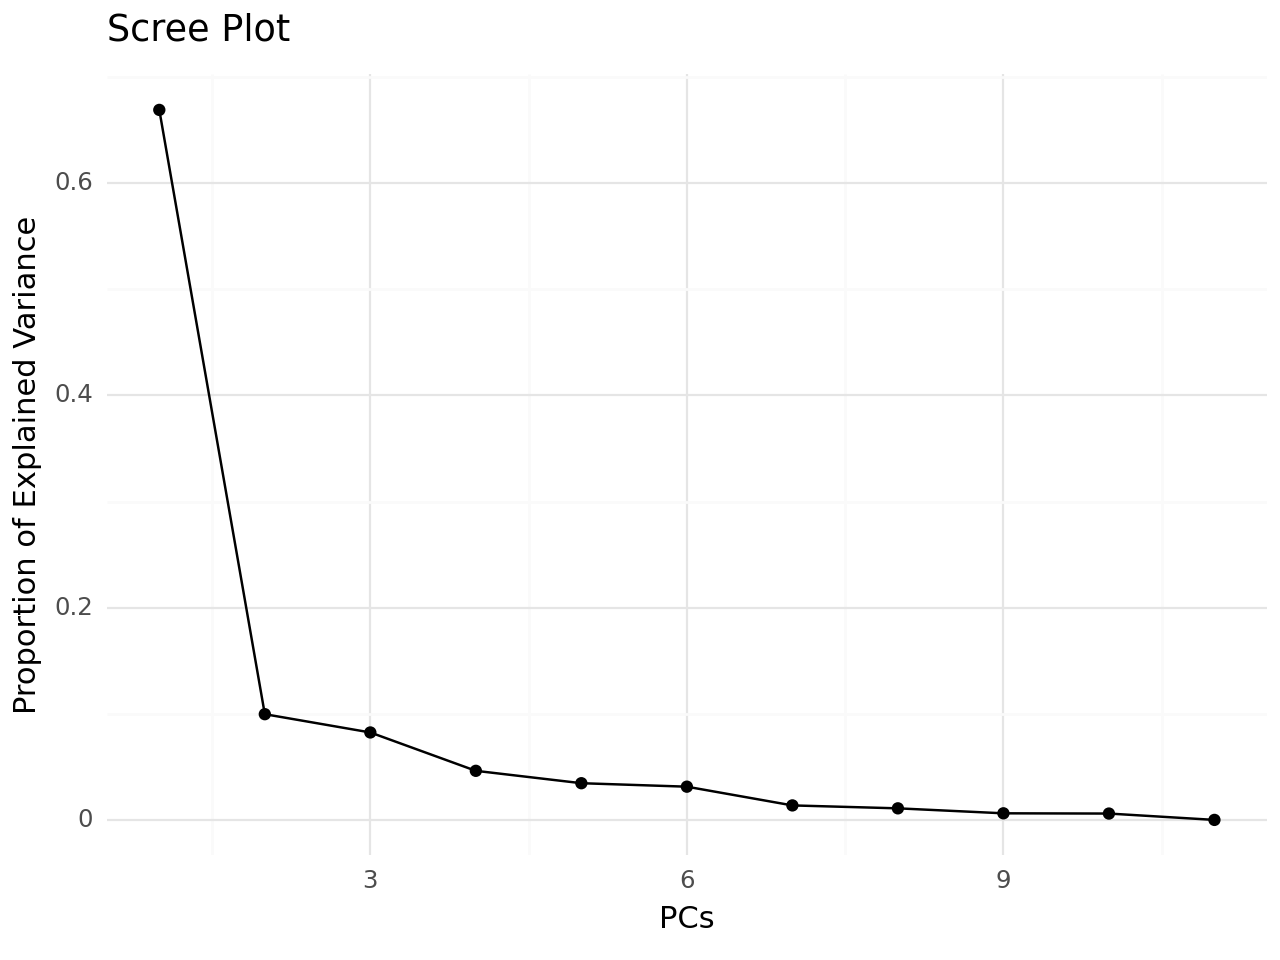

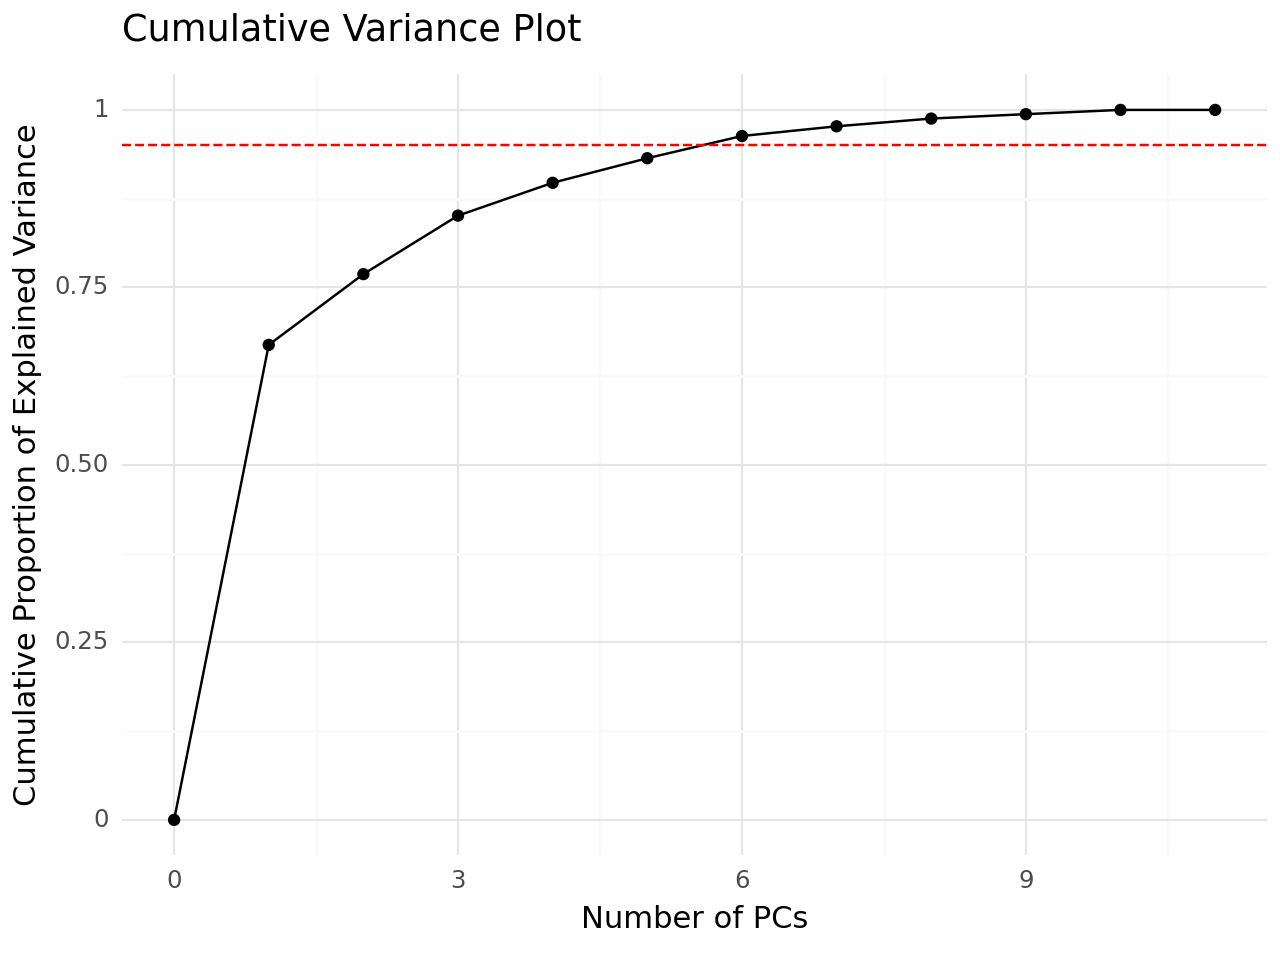

In [12]:
# scree/cumvar plot
pcaDF = pd.DataFrame({"expl_var" :
                      pipe_behaviour.named_steps["pca"].explained_variance_ratio_,
                      "pc": range(1,12),
                      "cum_var":
                      pipe_behaviour.named_steps["pca"].explained_variance_ratio_.cumsum()})

# scree
print(ggplot(pcaDF, aes(x = "pc", y = "expl_var")) + geom_line() + geom_point() +
 theme_minimal() + labs(x = "PCs", y = "Proportion of Explained Variance", title = "Scree Plot"))

# cumulative variance
pcaDF0 = pd.concat([pcaDF, pd.DataFrame({"pc": [0], "cum_var": [0]})]) # add 0,0 for reference

print(ggplot(pcaDF0, aes(x = "pc", y = "cum_var")) + geom_line() +
 geom_point() + geom_hline(yintercept = 0.95, color = "red", linetype = "dashed") +
 theme_minimal() + labs(x = "Number of PCs", y = "Cumulative Proportion of Explained Variance", title = "Cumulative Variance Plot"))

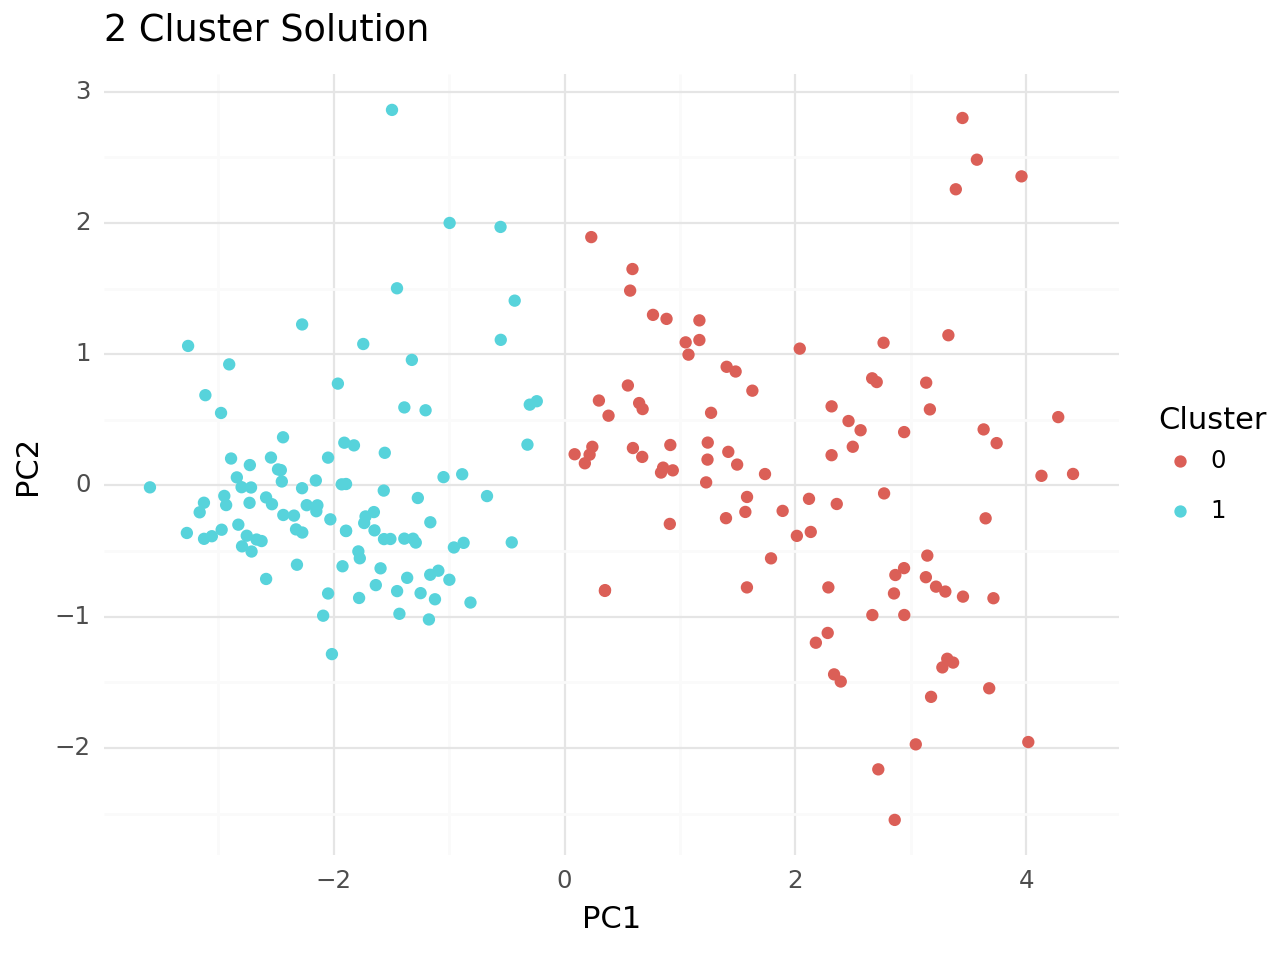

In [13]:
X = behaviour[feats]
pre = make_column_transformer(
                            (StandardScaler(), contin),
                            (OneHotEncoder(), categorical),
                            remainder = "passthrough"
                            )
km = KMeans(2)
pipe = Pipeline([
      ("pre", pre),
      ("km", km)
])
labels = pipe.fit_predict(X)

behaviour_PCs["cluster"] = labels
print(ggplot(behaviour_PCs, aes(x = "PC1", y = "PC2", color = "factor(cluster)")) +
      geom_point() +
      theme_minimal() + 
      scale_color_discrete(name = "Cluster") + 
      labs(x = "PC1", 
           y = "PC2",
           title = "2 Cluster Solution"))

<Axes: >

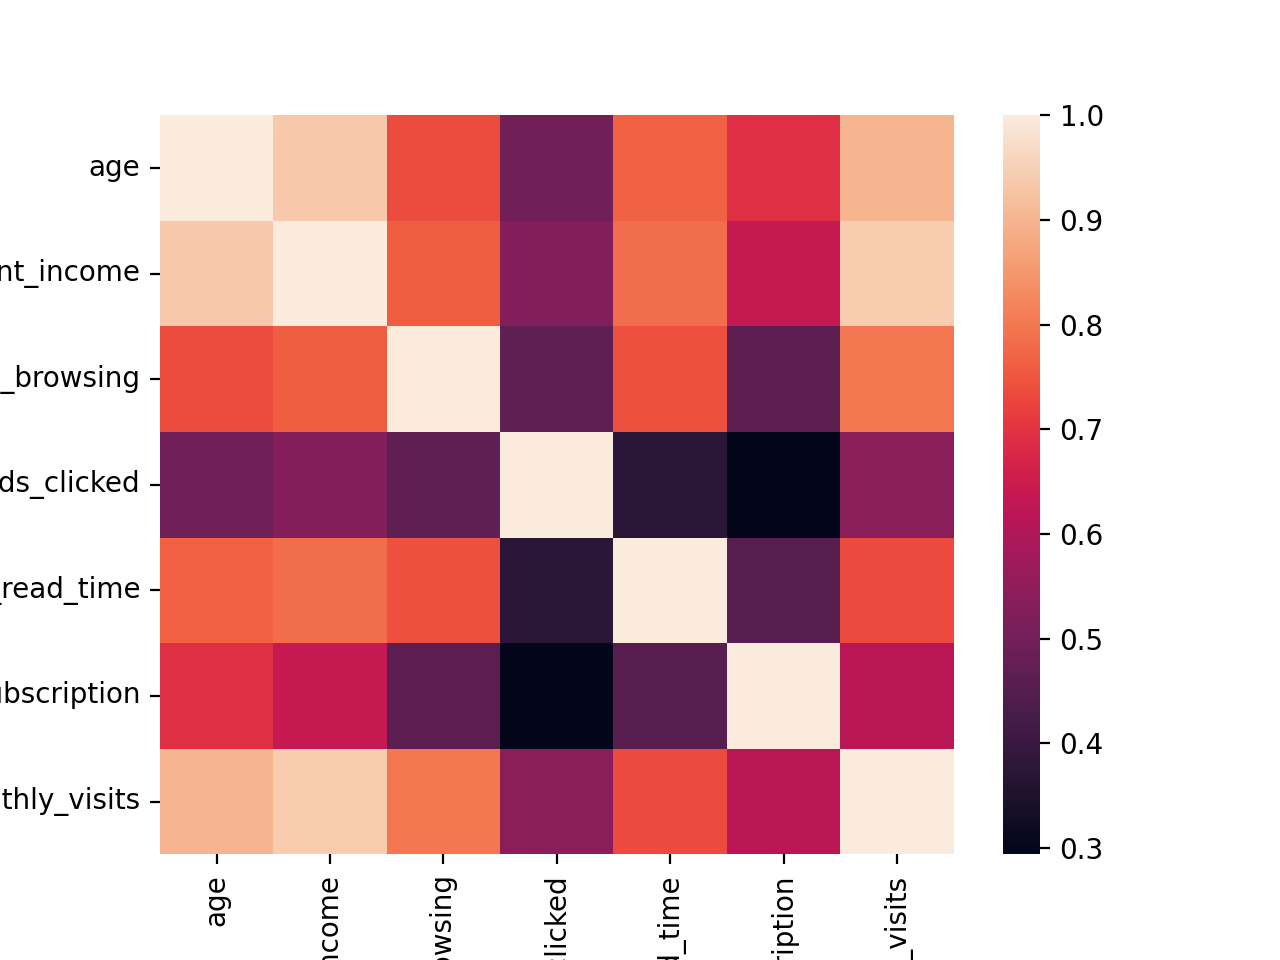

In [14]:
import seaborn as sns
bcorr = behaviour[contin].corr()
sns.heatmap(bcorr)

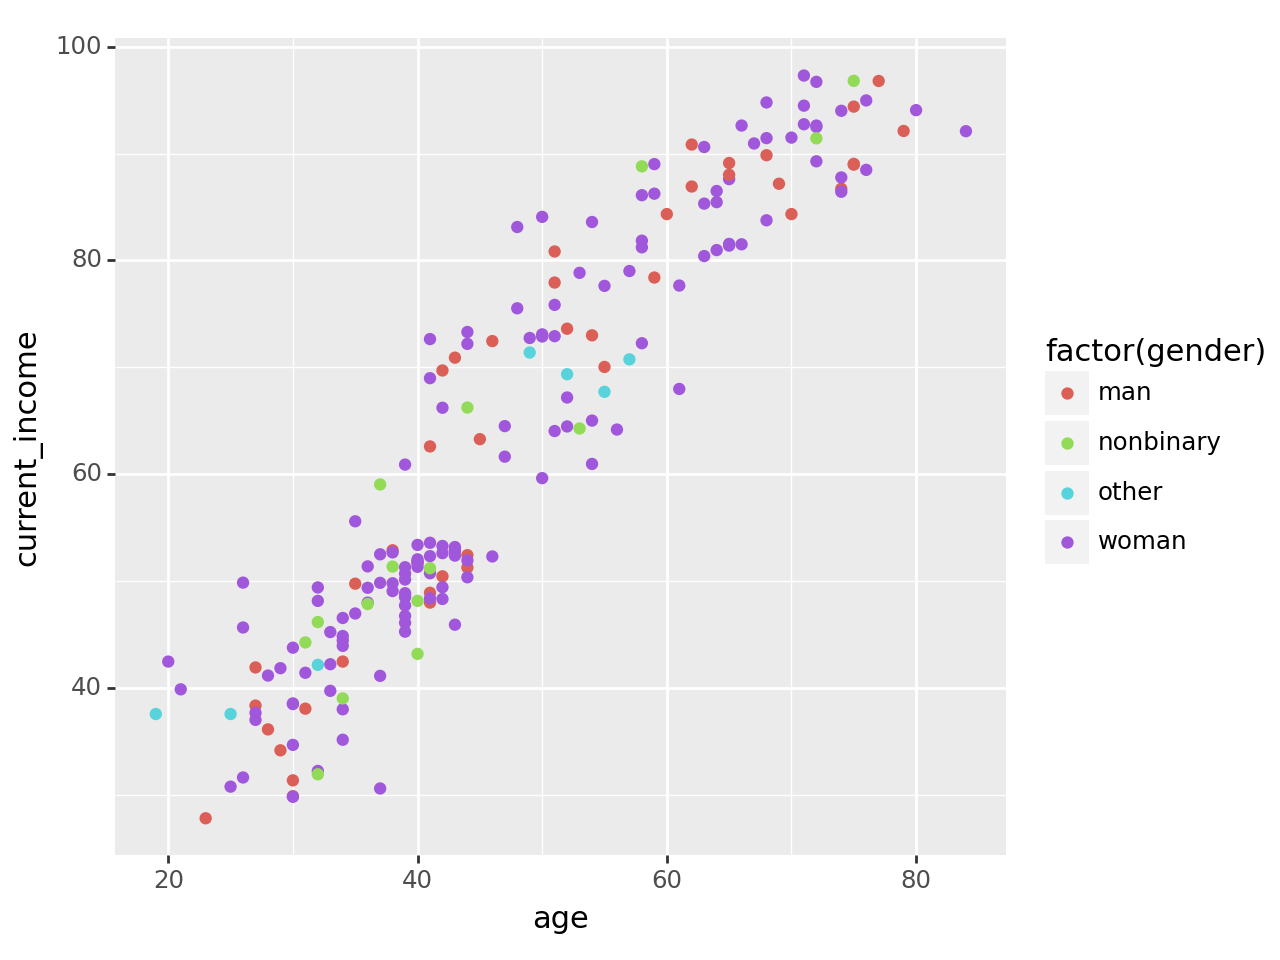

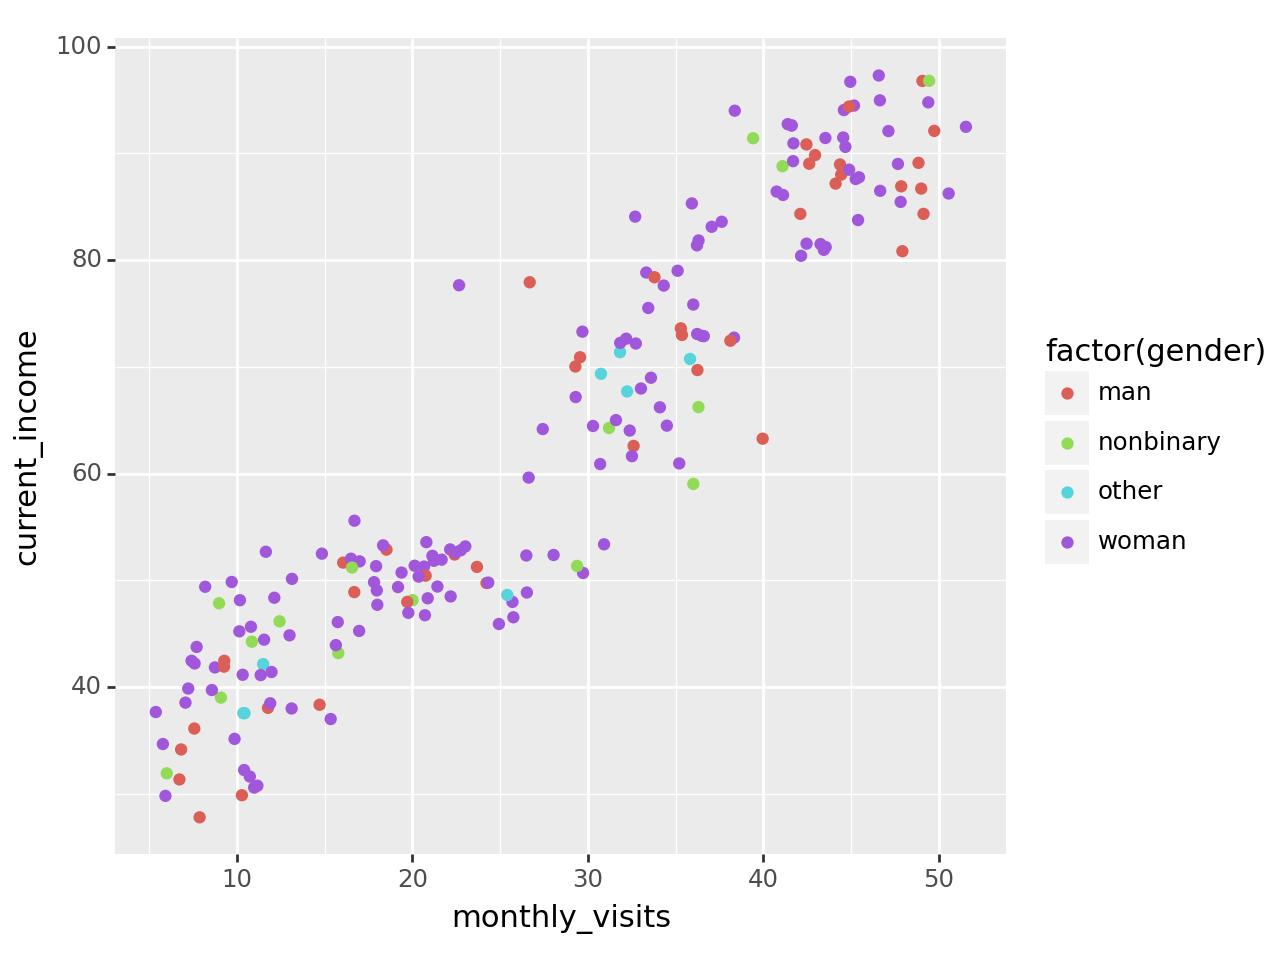

In [15]:
print((ggplot(behaviour, aes(x = "age", y = "current_income",color="factor(gender)")) + geom_point()))
print((ggplot(behaviour, aes(x = "monthly_visits", y = "current_income",color="factor(gender)")) + geom_point()))

Article

In [16]:
feats = ["Stocks", "Productivity", "Fashion", "Celebrity", "Cryptocurrency", "Science", "Technology", "SelfHelp", "Fitness", "AI"]

pre = make_column_transformer((StandardScaler(), feats),
                            remainder = "passthrough")
pca = PCA()
pipe_article = Pipeline([
    ("pre", pre),
    ("pca", pca)
])

article_sub = article[feats]
article_sub.dropna(inplace = True)
article_sub.reset_index(inplace = True, drop = True)

# fit
pipe_article.fit(article_sub)

article_PCs = pd.DataFrame(pipe_article.transform(article_sub))

article_PCs.columns = ["PC" + str(i+1) for i in range(len(feats))]

article_PCs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,1.321871,0.516118,0.192889,-0.526214,0.662521,-0.322111,-0.542647,0.798765,-0.149308,0.352135
1,0.196003,0.456469,-0.078779,-0.311596,-0.783870,-1.466926,0.043342,-0.906476,-0.009285,-0.017713
2,0.724228,-0.048395,0.743125,-0.165600,-0.420733,0.224689,-0.820437,-1.204530,-0.966299,0.315047
3,-0.050824,0.346312,2.449669,1.502613,-1.159525,0.646341,-0.229276,0.062414,-0.811074,0.595148
4,0.613795,-0.287983,0.894627,0.026917,-0.956389,-0.536505,-0.460625,0.044097,-0.175275,-0.123182


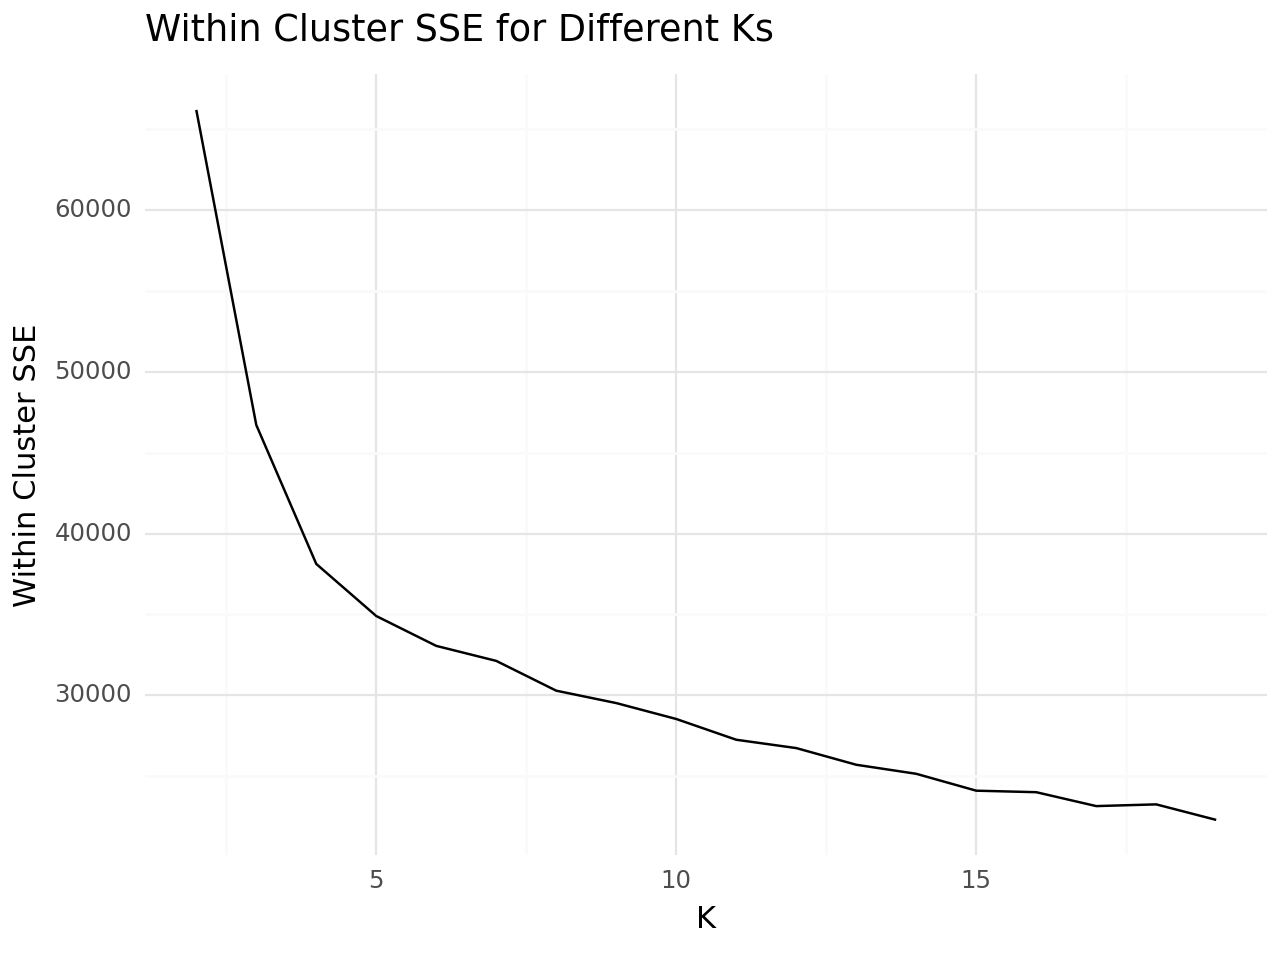

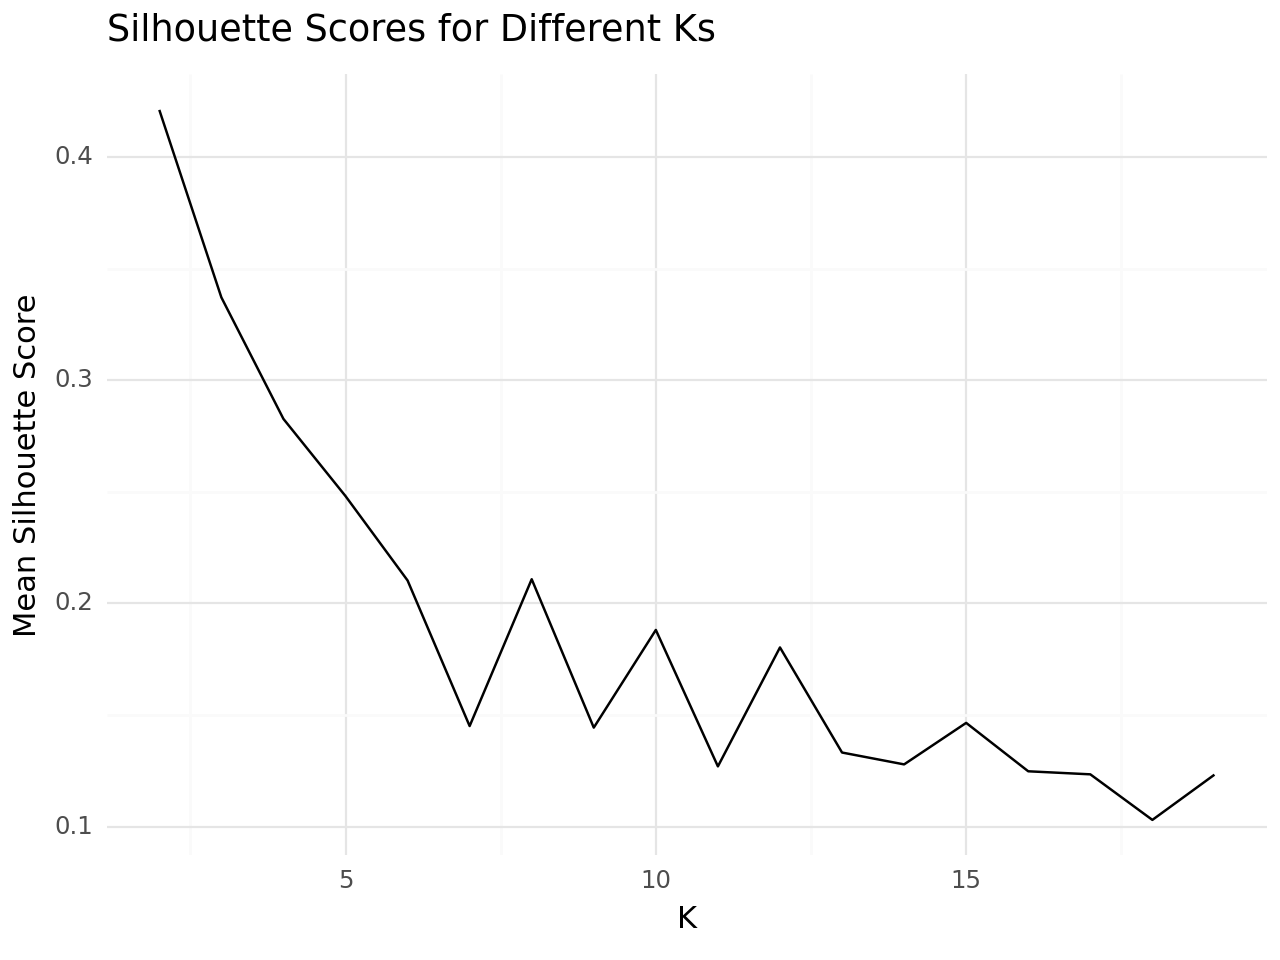

In [17]:
# grab data we want to cluster
feats = ["Stocks", "Productivity", "Fashion", "Celebrity", "Cryptocurrency", "Science", "Technology", "SelfHelp", "Fitness", "AI"]

X = article[feats]

# create empty model
z = make_column_transformer((OrdinalEncoder(), feats),
                            remainder = "passthrough")

metrics = {"SSE": [], "sil": [], "k": []}

for i in range(2,20):
    km = KMeans(i)
    pipe = Pipeline([
        ("pre", z),
        ("km", km)
    ])
    
    labels = pipe.fit_predict(X[feats])
    sil = silhouette_score(X[feats], labels)
    sse = pipe.named_steps["km"].inertia_

    metrics["SSE"].append(sse)
    metrics["sil"].append(sil)
    metrics["k"].append(i)

df = pd.DataFrame(metrics)

print(ggplot(df, aes(x = "k", y = "SSE")) +
  geom_line() + theme_minimal() +
    labs(x = "K", y = "Within Cluster SSE",
         title = "Within Cluster SSE for Different Ks"))

print(ggplot(df, aes(x = "k", y = "sil")) +
  geom_line() + theme_minimal() +
    labs(x = "K", y = "Mean Silhouette Score",
         title = "Silhouette Scores for Different Ks"))

In [18]:

from sklearn.cluster import AgglomerativeClustering


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

# make sure you have these to make dendrograms!-------
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt

In [19]:
feats = ["Stocks", "Productivity", "Fashion", "Celebrity", "Cryptocurrency", "Science", "Technology", "SelfHelp", "Fitness", "AI"]
X = article[feats]

# create empty model
z = make_column_transformer((OrdinalEncoder(), feats),
                            remainder = "passthrough")

hac = AgglomerativeClustering(affinity = "cosine",
                             linkage = "average",
                             distance_threshold=0,
                             n_clusters = None) # come back and change the number of clusters

pipe = Pipeline([("z", z),
                 ("model", hac)])


# fit model and get labels
labels = pipe.fit_predict(X[feats])

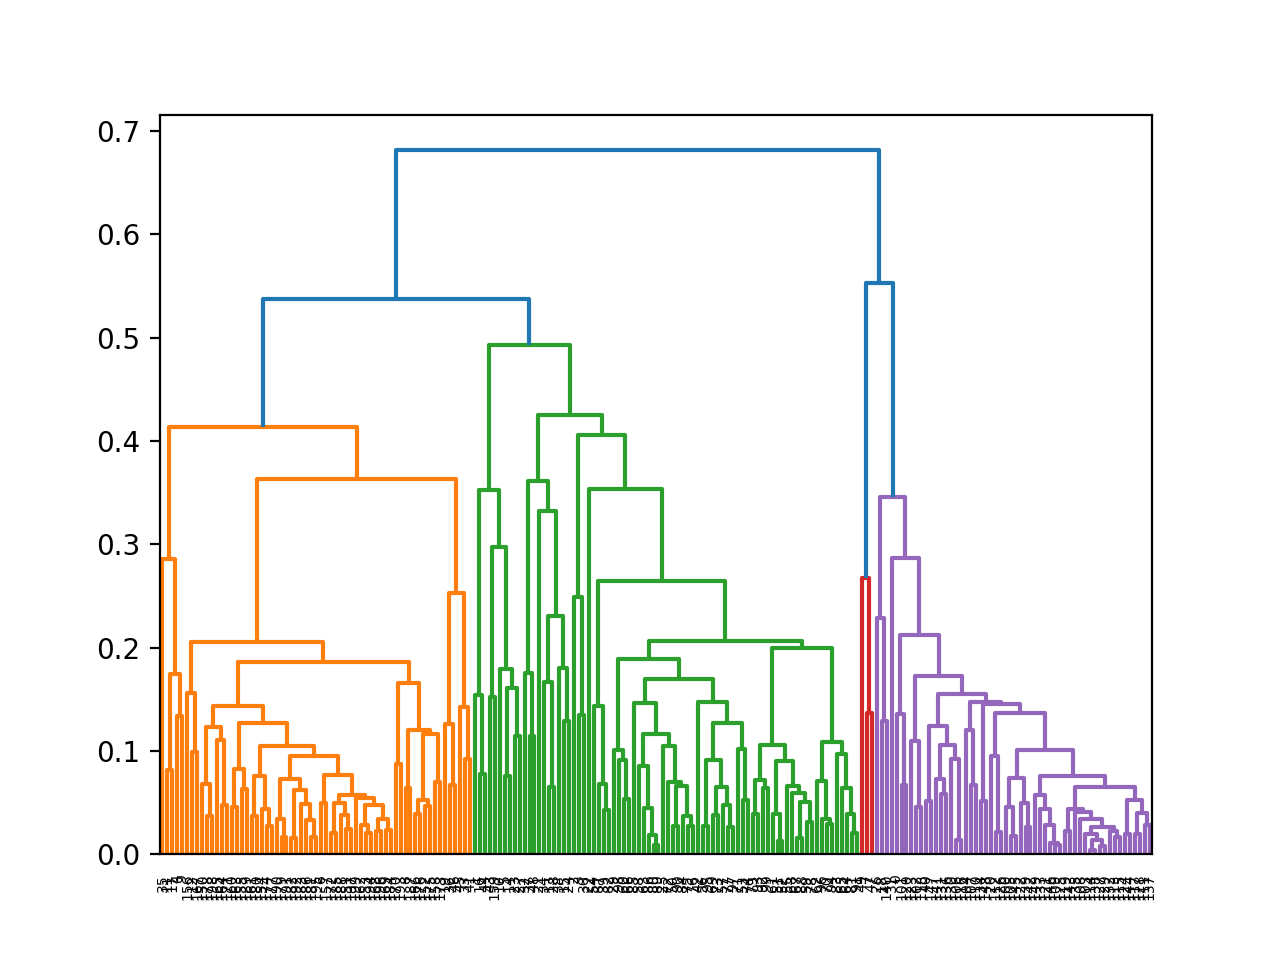

In [36]:
def plot_dendrogram(pipe, **kwargs):

    if "model" not in pipe.named_steps.keys():
        raise NameError("Your clustering pipeline step must be called 'model' for this function to work.")
    
    # create the counts of samples under each node
    counts = np.zeros(pipe.named_steps["model"].children_.shape[0])
    n_samples = len(pipe.named_steps["model"].labels_)
    for i, merge in enumerate(pipe.named_steps["model"].children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [pipe.named_steps["model"].children_, pipe.named_steps["model"].distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    sch.dendrogram(linkage_matrix, **kwargs)


plot_dendrogram(pipe, color_threshold = .5)

In [22]:
article.groupby(['Technology']).mean().sum()


Stocks             166.496951
Productivity       154.974010
Fashion            164.208198
Celebrity          138.610248
Cryptocurrency     152.077113
Science            527.068203
SelfHelp           138.332574
Fitness            173.137695
AI                 775.159127
id                3616.781435
dtype: float64

In [23]:
article.groupby(['Stocks']).mean().sum()

Productivity       193.572805
Fashion             88.558352
Celebrity           79.550103
Cryptocurrency      63.305506
Science            180.625741
Technology         198.884337
SelfHelp           239.876121
Fitness            149.031921
AI                 333.445490
id                2660.009734
dtype: float64

In [24]:
article.groupby(['Cryptocurrency']).mean().sum()

Stocks            84.933322
Productivity     109.851970
Fashion           83.888725
Celebrity         98.085294
Science          213.982345
Technology       231.213749
SelfHelp         117.393857
Fitness           91.919793
AI               354.675295
id              1938.281242
dtype: float64

In [25]:
article.groupby(['Fitness']).mean().sum()

Stocks             161.169042
Productivity       174.332079
Fashion             96.635407
Celebrity           68.863104
Cryptocurrency      58.201956
Science            161.115599
Technology         149.396465
SelfHelp           220.899593
AI                 242.110933
id                2158.009691
dtype: float64

In [26]:
article.groupby(['Fashion']).mean().sum()

Stocks              86.297955
Productivity        97.900305
Celebrity          250.026129
Cryptocurrency      59.882173
Science            135.133364
Technology         149.678999
SelfHelp           105.246337
Fitness             81.321856
AI                 189.294292
id                2267.248107
dtype: float64

In [27]:
article.groupby(['Celebrity']).mean().sum()

Stocks              89.232240
Productivity       103.419586
Fashion            291.993045
Cryptocurrency      80.332617
Science            151.982908
Technology         191.131239
SelfHelp           102.963801
Fitness             77.246364
AI                 215.854326
id                2995.864424
dtype: float64

In [28]:
df = pd.DataFrame(article.sum())
df = df.drop(['id'])
df=df.reset_index()
df['count'] = df[0]

In [29]:
df

,index,0,count
0,Stocks,1056,1056
1,Productivity,1201,1201
2,Fashion,1162,1162
3,Celebrity,1269,1269
4,Cryptocurrency,625,625
5,Science,1453,1453
6,Technology,1598,1598
7,SelfHelp,1407,1407
8,Fitness,888,888
9,AI,2204,2204


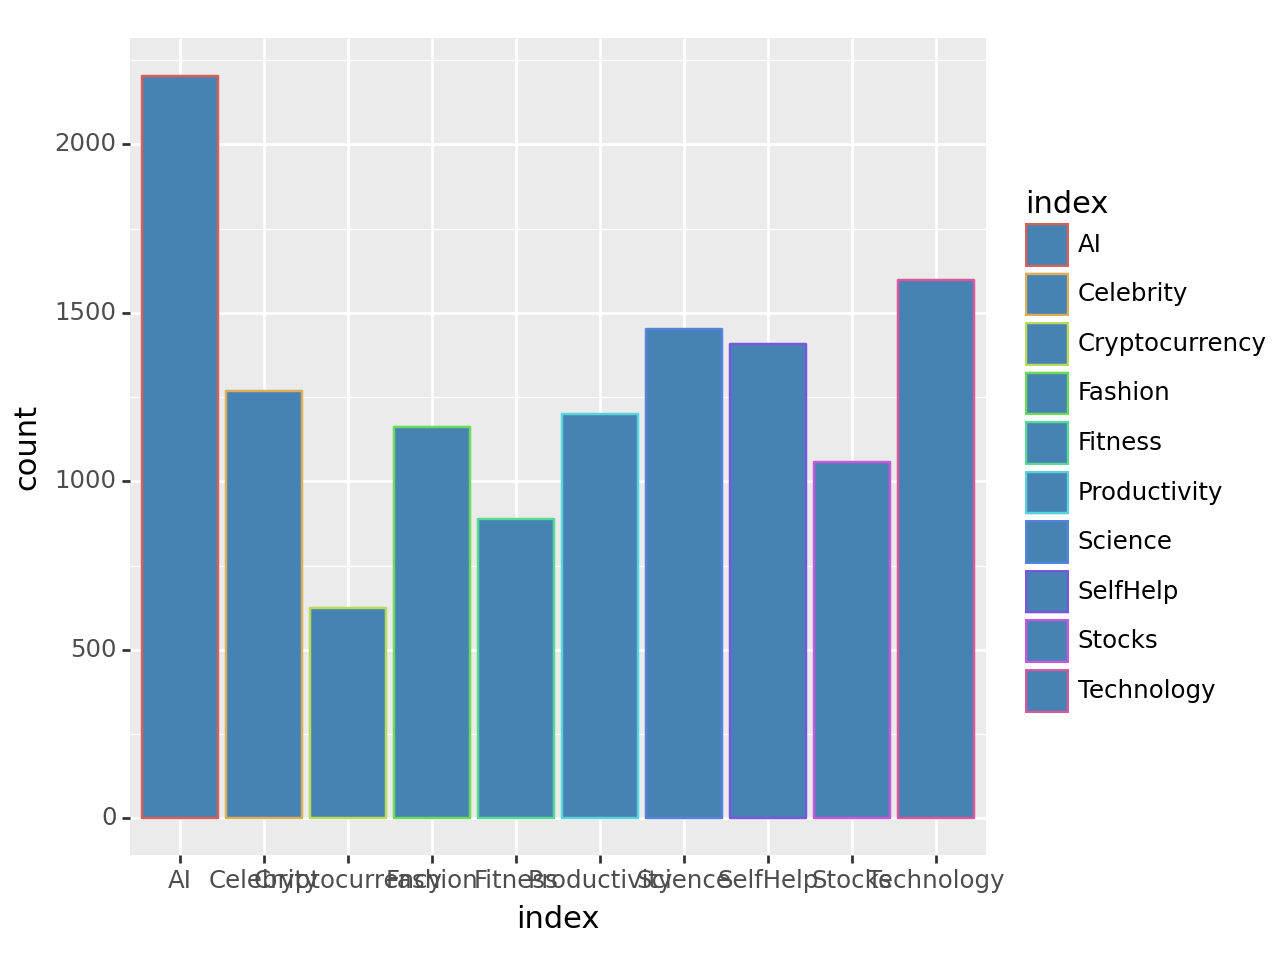

In [30]:
print((ggplot(df,aes(x='index',y='count',color = 'index'))  + geom_bar(stat='identity', fill = 'steelblue')))

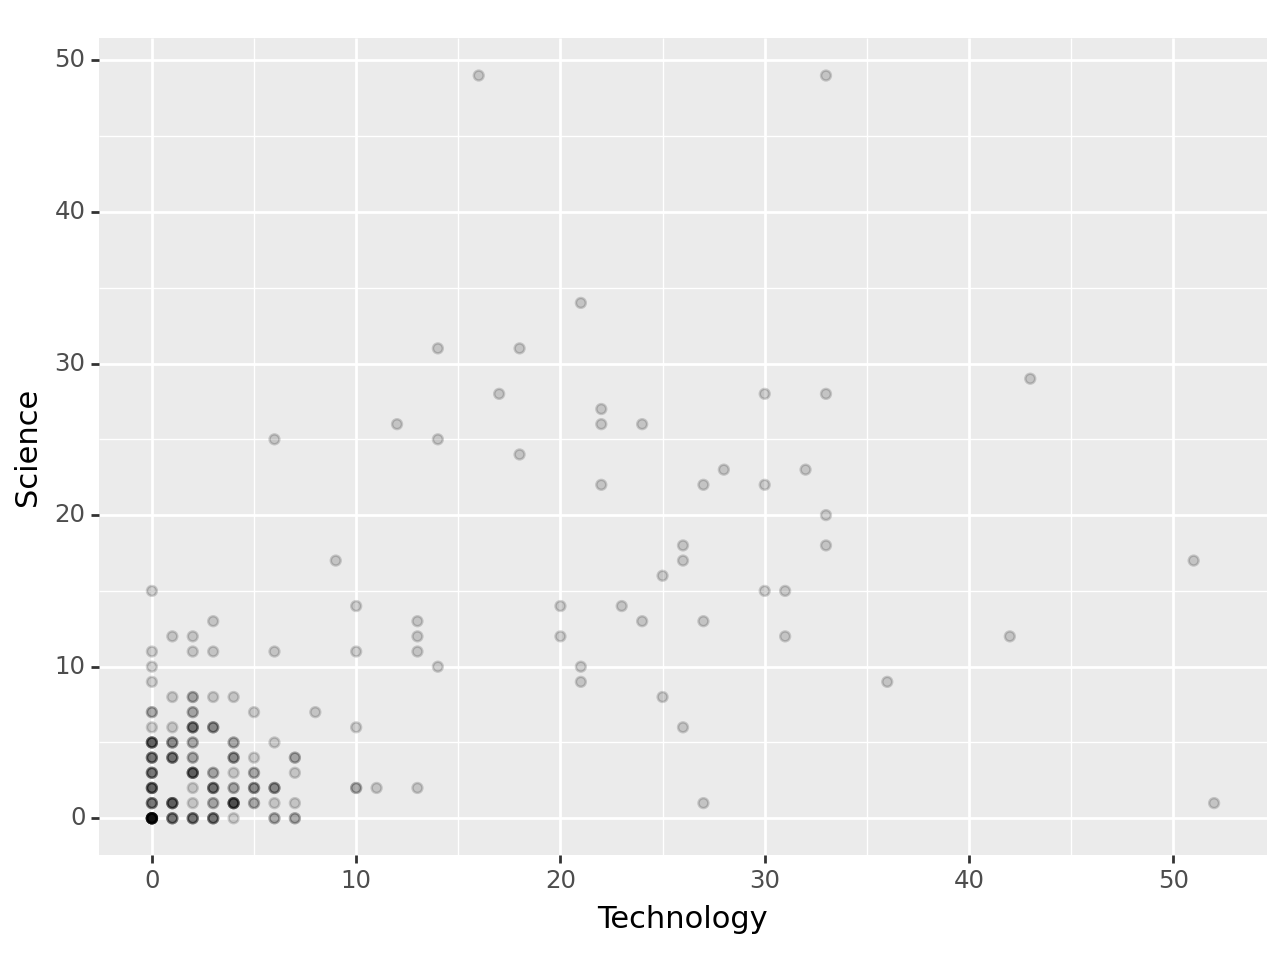

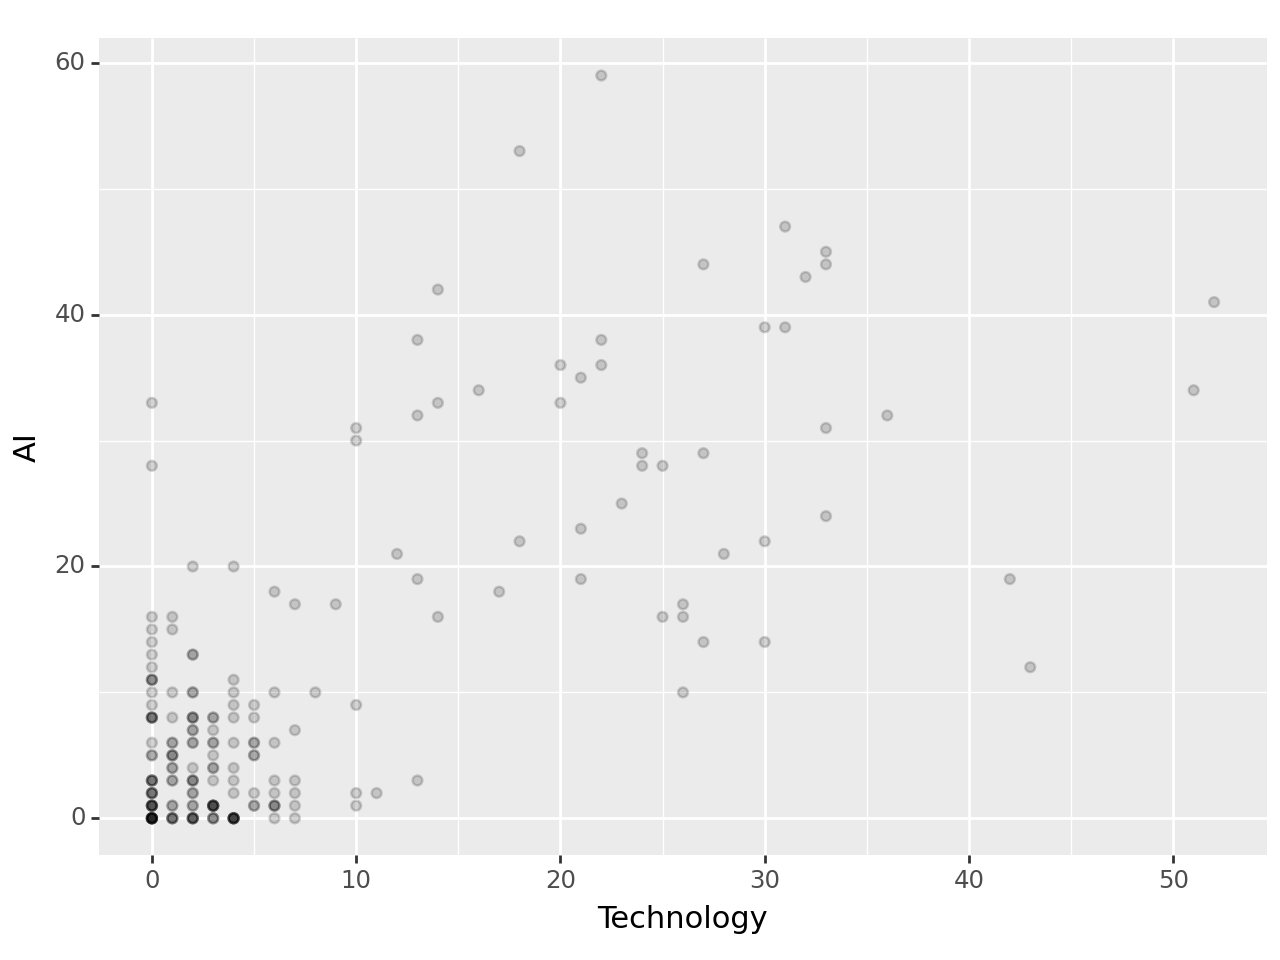

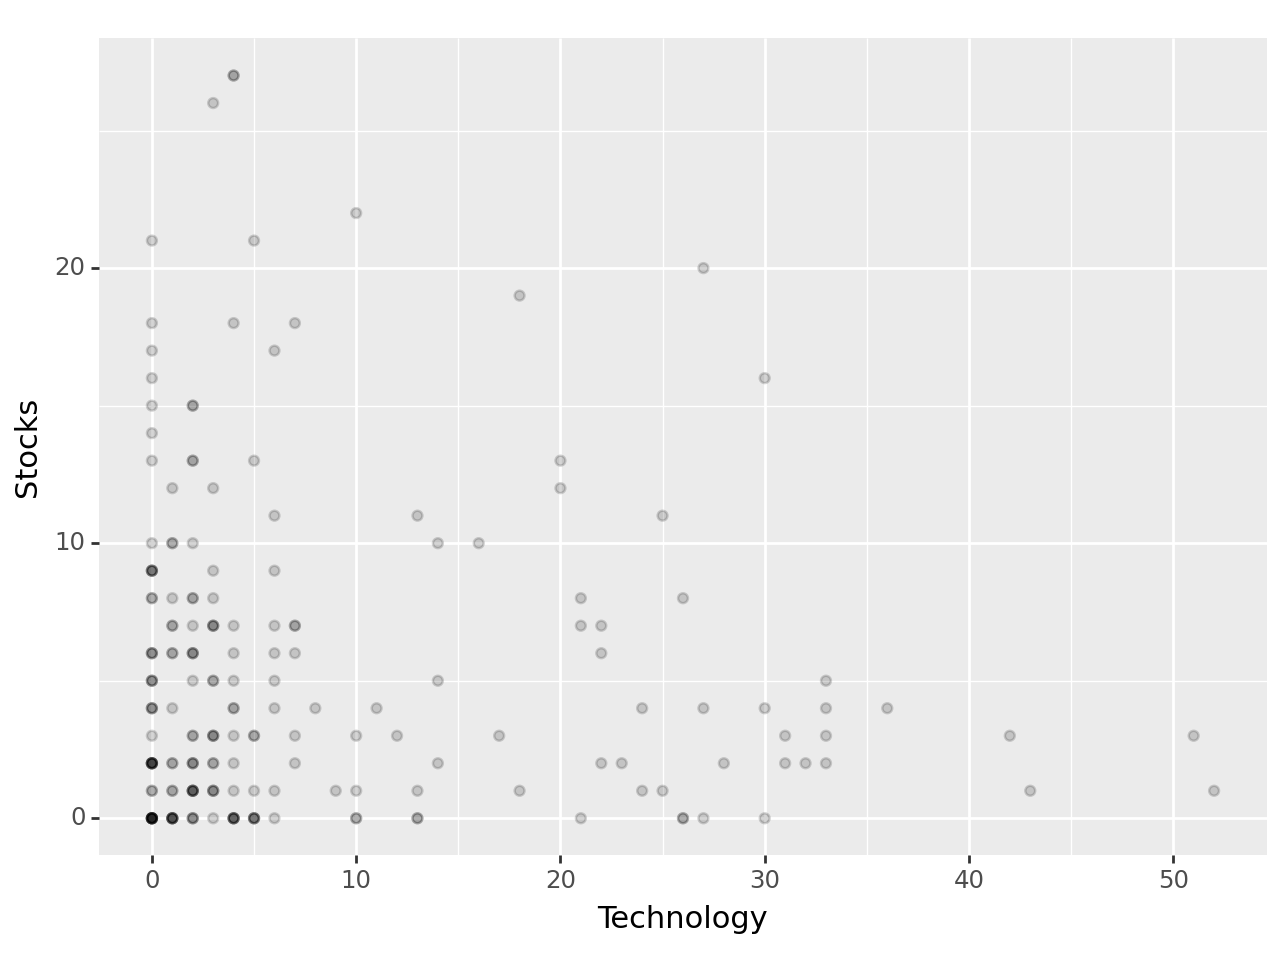

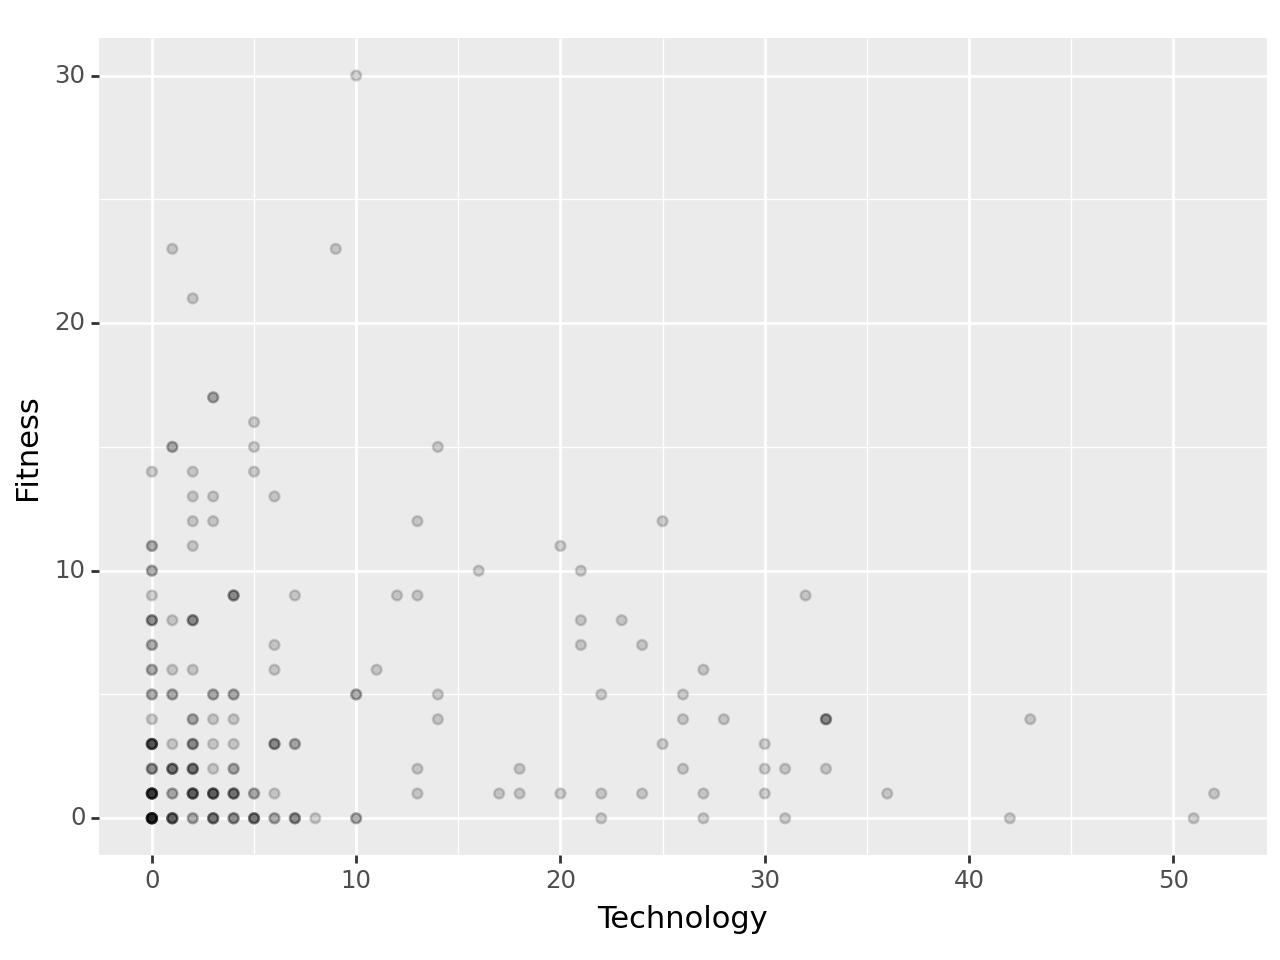

In [31]:
print((ggplot(article, aes(x = "Technology", y = "Science")) + geom_point(alpha = 1/6)))
print((ggplot(article, aes(x = "Technology", y = "AI")) + geom_point(alpha = 1/6)))
print((ggplot(article, aes(x = "Technology", y = "Stocks")) + geom_point(alpha = 1/6)))
print((ggplot(article, aes(x = "Technology", y = "Fitness")) + geom_point(alpha = 1/6)))

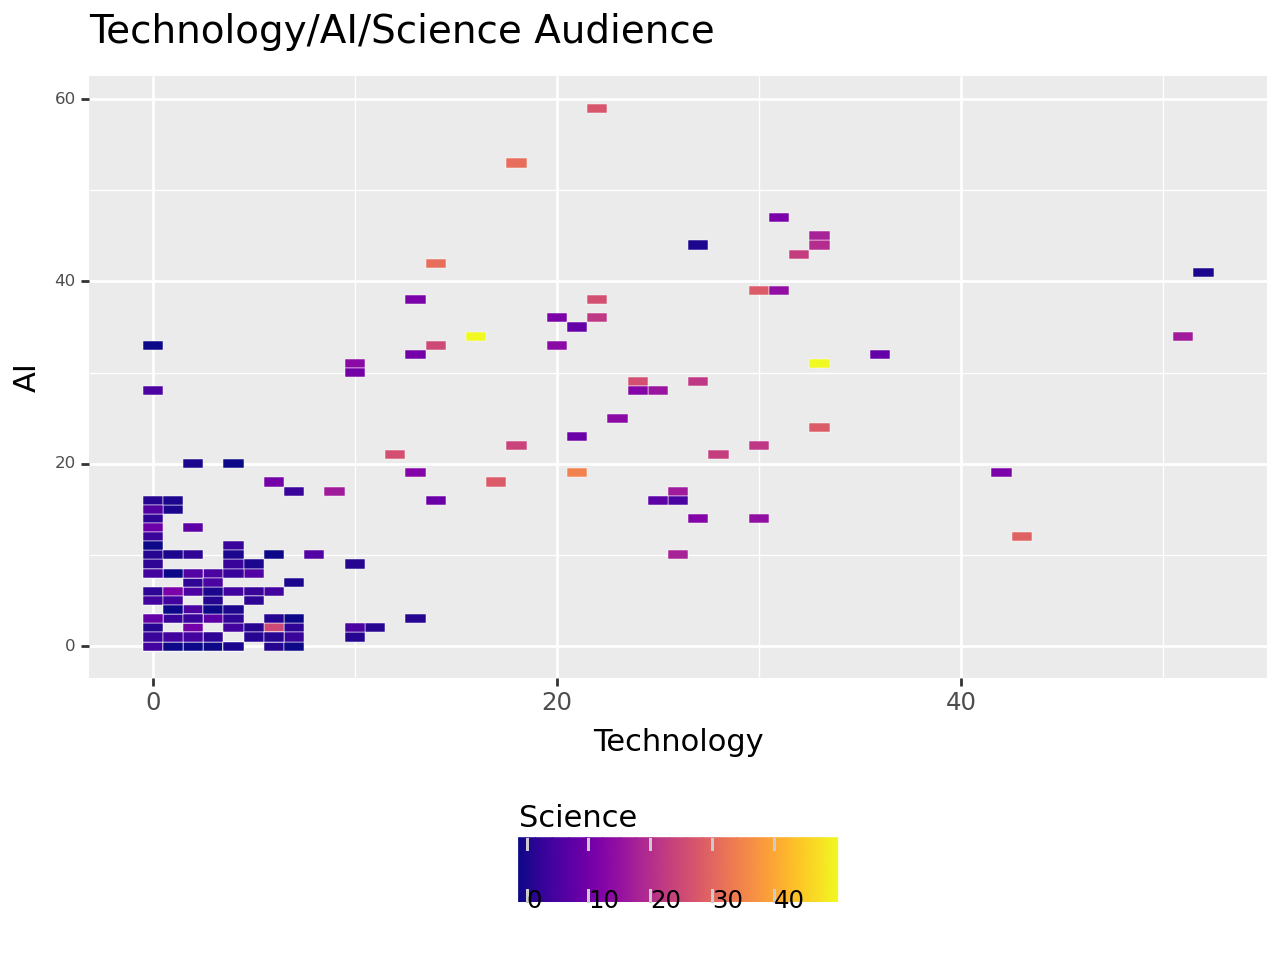

In [32]:
import plotnine as p9
g = (p9.ggplot(article,p9.aes(x='Technology',y='AI',fill='Science'))
     + p9.geom_tile(color='white',size=.1)
     + p9.labs(title='Technology/AI/Science Audience')
     + p9.scale_fill_cmap('plasma')
     + p9.theme(legend_position = 'bottom',
               plot_title = p9.element_text(size=14),
               axis_text_y = p9.element_text(size=6)))
print(g)

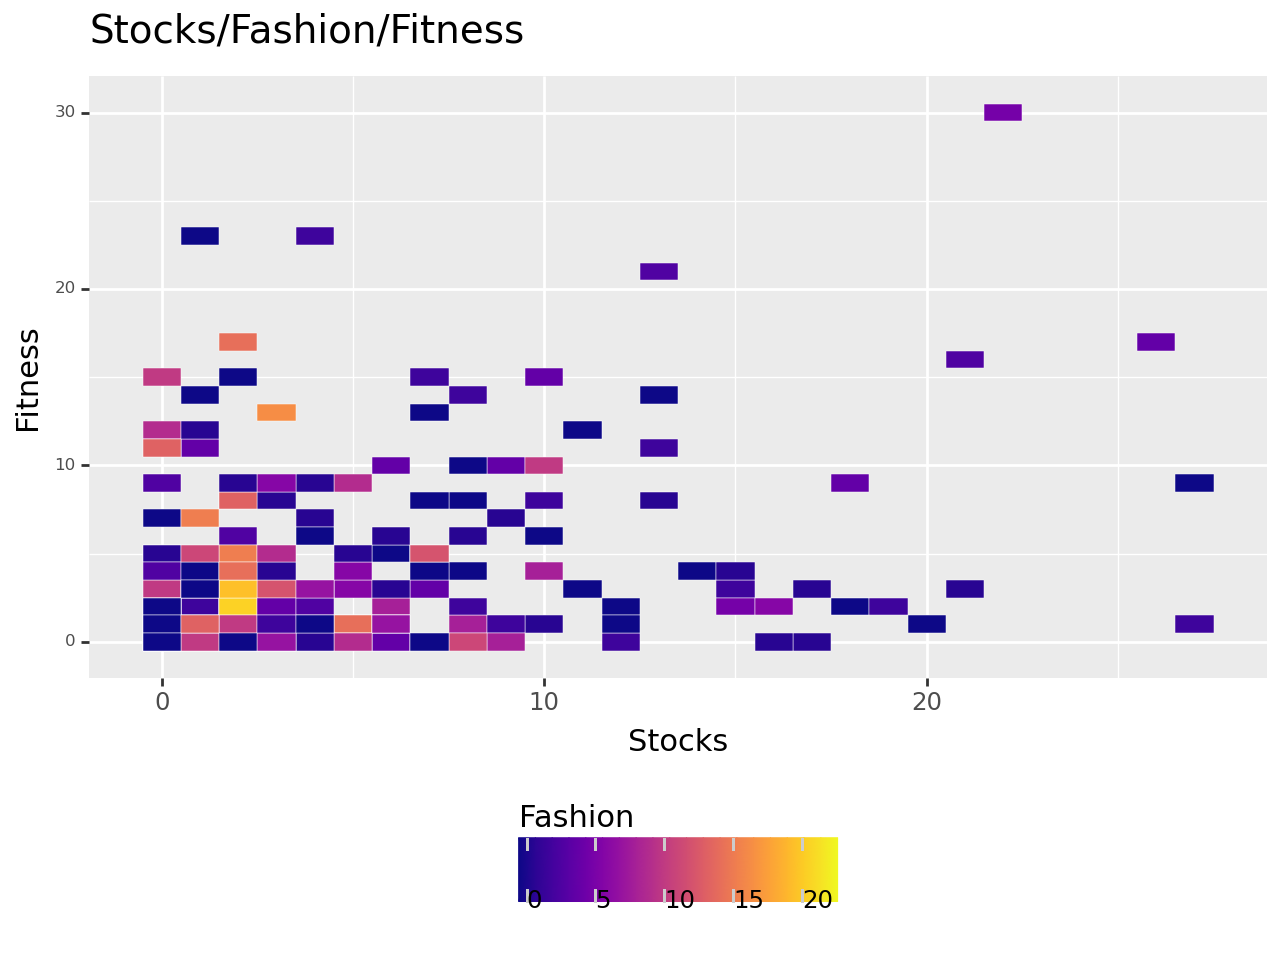

In [33]:
g = (p9.ggplot(article,p9.aes(x='Stocks',y='Fitness',fill='Fashion'))
     + p9.geom_tile(color='white',size=.1)
     + p9.labs(title='Stocks/Fashion/Fitness')
     + p9.scale_fill_cmap('plasma')
     + p9.theme(legend_position = 'bottom',
               plot_title = p9.element_text(size=14),
               axis_text_y = p9.element_text(size=6)))
print(g)

<Axes: >

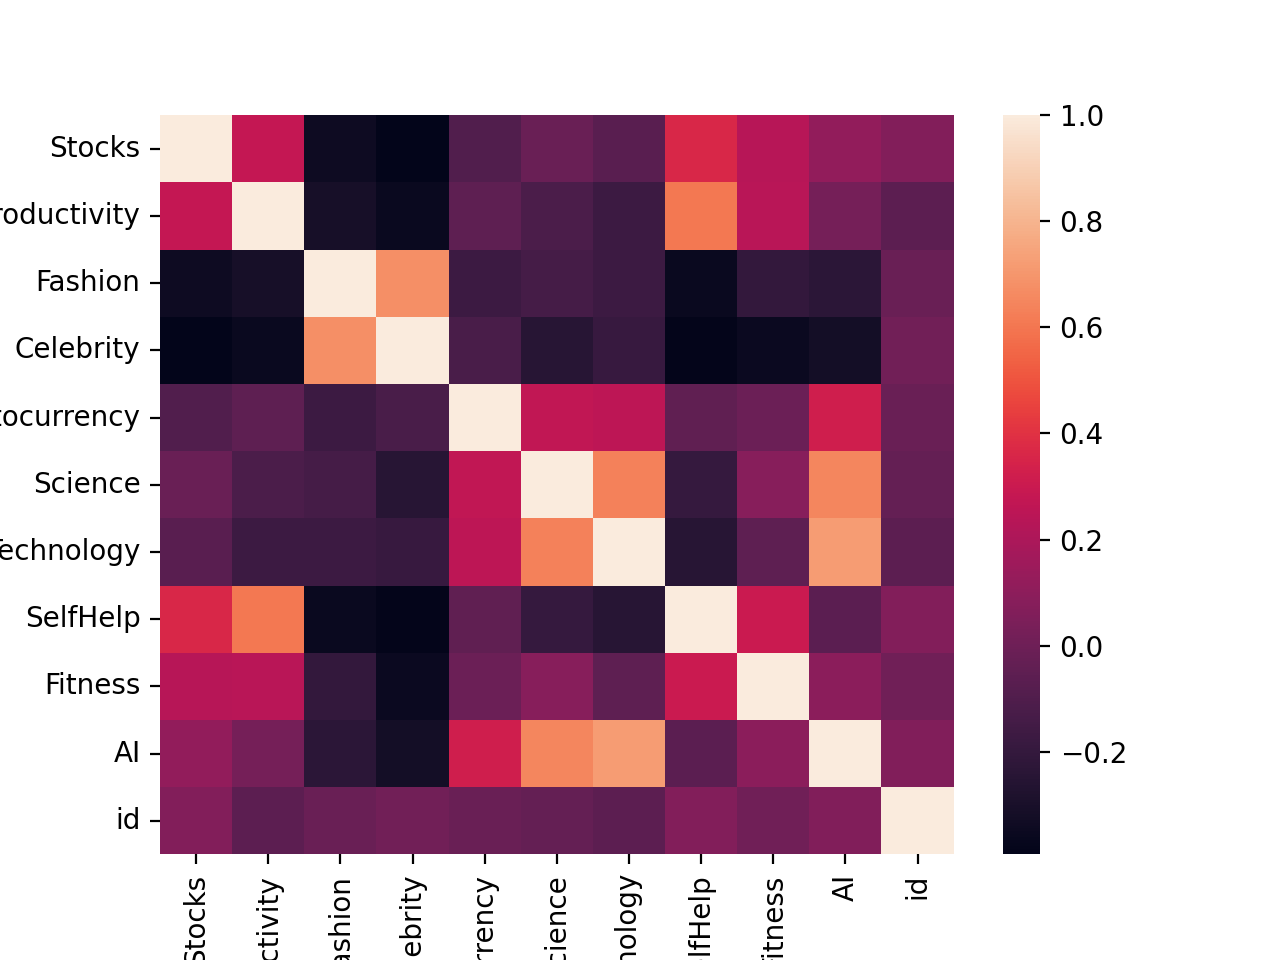

In [34]:
import seaborn as sns
corr = article.corr()
sns.heatmap(corr)


## 1. Behavioral Clustering
- Make ggplot scatterplots of pairs of your features to give you a little bit of information about the data, and to help you decide which algorithm to use (you don’t need to make scatterplots for all possible pairs of features, just make sure each feature appears at least once).
- Using `sklearn` `Pipeline`s, build and fit **one** clustering models (choose from **K-Means**, **Gaussian Mixture Models**, **DBSCAN**, and **Hierarchical Clustering**) using all the continuous/interval variables *except* `id`.
- Appropriately Z-score continuous/interval variables.
- Choose the number of clusters (if applicable) and in the **Methods** section of your report, explain how you chose. Also explain **why/how** you chose any relevant hyperparameters (such as linkage, distance metric, eps, min samples...).
- In the **Methods** section of your report, explain **in detail** both the *pros* and *cons* of the all the clustering models (e.g. what type of data do they work well for? Are there any possible downsides of using them?) and *provide a justification* for why you chose the clustering algorithm that you did.
- Using **plotnine** and **PCA**, create a scatterplot of your clusters by plotting the first Principal Component (PC1) on the x-axis, and the second Principal Component (PC2) on the y-axis. Color the points by their cluster. Include this plot in your **Results** Section.
- Create at least one *other* summary of what kind of customers are in each cluster. This could be a different ggplot (built using plotnine), or a neatly formatted summary table (hint: `groupby()`). In the **Results** section, discuss in detail:
    - what kind of customers are in each cluster
    - how the clusters "performed" (e.g. are they good clusters? How can you tell?)
    - how that information might help the company



## 2. Article Clustering
- Using an `sklearn` `Pipeline`, build and fit a **Hierarchical Clustering** model using all the variables *except* `id`. Use cosine similarity as your distance metric (also called `affinity`) and `average` linkage.
- Do **not** z-score, as these are counts.
- Create a dendrogram and in the **Methods** section of your report, explain **what number** of cluster you decided to use and **why**.
- In the **Results** section, discuss the performance of the model based on the dendrogram.
- Create at least one other summary of what kind of customers are in each cluster. This could be a different ggplot (built using plotnine), or a neatly formatted summary table (hint: `groupby()`). In the **Results** section, discuss in detail what kind of customers are in each cluster, and how that information might help the company.



## 3. Report

[QUARTO TEMPLATE HERE](https://github.com/cmparlettpelleriti/CPSC392ParlettPelleriti/blob/master/Homework/Homework3Template.qmd)

[DOCS TEMPLATE HERE](https://docs.google.com/document/d/1ZxUz6WPFjadOh4tkZS0ydkFFXfXQytNf34-Cgx_eap4/edit?usp=sharing)

Your Technical Report is a way to practice presenting and formatting your results like you would in industry. Make sure your report and **plots** are clear, and explain things clearly. Write a report that has the following sections:

1. **Introduction**: description of the problem (e.g. what are you predicting? what variables do you have available? How might this model be useful if you are successful). You should end with a sentence or two about what the impact of these models could be.

2. **Methods**: describe your models in detail (as if explaining them to the CEO of the media company), as well as any pre-processing you had to do to the data.

3. **Results**: How did your models perform? Describe the clusters from your Behavioral Clustering models. Were they different? If so, how? What could the CEO of the media company do with these clusters? Describe the clusters form your Article Clustering model. What could the CEO of the media company do with these clusters?

4. **Discussion/Reflection**: A few sentences about what you learned from performing these analyses, and at least one suggestion for what you'd add or do differently if you were to perform this analysis again in the future.